# Notes on comparison between W28/W44/HB3

* The point of this is that at the least, I have these SNRs for my work above. 
* I want to know what it is that's different about these SNRs, compared to all others, that make it more difficult to detect these. 
* I also want to know what's similar & different amongst the 3 
* Start with the info I already have on each from that spread sheet for vels and SNR cat yaml, LAT info
* add things like 
 * spectral params
 * what multiwavelngth info I have
     * or lack there of
 * physical infor abuot environment like:
     * density of nearby clouds
     * mass
     



### Played around with astroquery but I don't think it gives anything useful right now. Either too much info, or not what I'm looking for.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
import numpy as np
import pandas as pd
#pd.options.display.mpl_style = 'default' #how does this mesh with the above style?
import yaml
import os,sys
from collections import defaultdict
from astropy.table import Table
from astropy import units as u
from scipy.optimize import optimize
#from pylab import *
from collections import OrderedDict
import matplotlib.lines as mlines
from IPython.display import Image



[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


In [14]:
#read in SNR cat superfile
#it would be nice to have it as a dataFrame as well since that's how all the other info is contained
superFileYaml = '/Users/jmcohen/Desktop/cur/snrcat1/trunk/superfile/snrdata.yaml'
snrSuperData   = yaml.load(open(superFileYaml))
sfDF = pd.DataFrame.from_items(snrSuperData.items()).T
# Following doesn't work because there are lists inside. Could convert that to pd.Series, does that do anything good?
#sfDF.describe 

In [15]:
maxl = len(sfDF.index)
pd.set_option('display.max_columns', maxl)
pd.set_option('display.max_rows', maxl)

In [16]:
#All info from the spreadsheet I made primarily to keep track of velocities of SNRs, but containing other info as well
#took this from nbyVelsDist.ipynb
superDF = pd.read_excel('/Users/jmcohen/Dropbox/CurrentWork/SNR_MC/PrelimNearby/initialList/nearbyNnewextList.xlsx',na_values =['nan','none','','None'])
superDF.set_index('SNR' ,inplace = True,drop = True)
superDF.describe()

,Vel_Range_Min_LAT__km_s,Vel_Range_Max_LAT__km_s,dist__kpc,dist_err_min__kpc,dist_err_max__kpc,Age__kyr,3FGL # Nby
count,8.000000,8.000000,47.000000,38.000000,37.000000,39.000000,0
mean,9.875000,28.000000,2.888574,0.684553,0.961757,23753.692308,NaN
std,31.669893,34.858899,1.992364,0.524738,0.989270,29027.036521,NaN
min,-25.000000,-30.000000,0.287000,0.000000,0.019000,1200.000000,NaN
25%,-5.000000,15.000000,1.500000,0.300000,0.300000,6800.000000,NaN
50%,0.000000,28.500000,2.200000,0.525000,0.700000,15000.000000,NaN
75%,22.500000,38.750000,4.250000,1.000000,1.000000,30000.000000,NaN
max,74.000000,82.000000,10.000000,2.000000,4.600000,150000.000000,NaN


In [6]:
superDF

,NickName,SNR CAT ID,nbyCandList,PT/EXT (DEL?),PSR,PWN,multiWave,Vlsr_SNR__km_s,Vlsr_err__km_s,Vel_Range_Min_LAT__km_s,Vel_Range_Max_LAT__km_s,Cloud_Vel_Min__km_s,Cloud_Vel_Max__km_s,Vlsr_method,dist__kpc,d_method,dist_err_min__kpc,dist_err_max__kpc,Age__kyr,3FGL # Nby,ref SNR d/v,ref Cloud vel,vfromJ,Notes,TeVDetect
SNR,,,,,,,,,,,,,,,,,,,,,,,,,
SNR005.4-01.2,Milne 56,n,y,NaN,y,NaN,"chandra (psr),maser",20,NaN,0,30,NaN,NaN,HI absorption,4.300,HI absorption,0.000,1.000,NaN,NaN,d/v: http://iopscience.iop.org/1538-4357/694/1...,NaN,NaN,Nearby PSR/PWN PSR J1801-2451. v determined fr...,NaN
SNR006.4-00.1,W28,y,y,y,NaN,NaN,most,7,NaN,0,27,0,20,maser,1.900,"CO, maser",0.300,0.300,45000,NaN,d/v: http://iopscience.iop.org/1538-3881/124/4...,http://adsabs.harvard.edu/cgi-bin/nph-data_que...,NaN,See LAT W28 paper and clouds notes. HESS: 0-20...,y
SNR008.7-00.1,W30,y,n,y,y,NaN,most,36,NaN,20,30,NaN,NaN,maser,4.500,"maser (kin,xrayTherm)",1.500,1.500,30000,NaN,d/v: http://iopscience.iop.org/1538-4357/694/...,http://adsabs.harvard.edu/cgi-bin/nph-data_que...,y,d_err is really range from kin-maser-xrayTherm...,y
SNR011.2-00.3,None,n,y,NaN,y,Y,"radio,IR,xray,TeV",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000,HI abs,0.500,0.500,1626,NaN,d: 1988MNRAS.231..735G,NaN,NaN,"Radio size is only 4’, likely < 2e3yr, TeV PWN...",y
SNR013.3-01.3,NaN,n,y,NaN,NaN,NaN,"xray,OH maser",30,NaN,NaN,NaN,20,45,maser,3.300,CO kinematics,1.700,1.800,NaN,NaN,d: http://articles.adsabs.harvard.edu/cgi-bin/...,http://articles.adsabs.harvard.edu/cgi-bin/nph...,NaN,"Rosat detected, Single dish maser detection of...",NaN
SNR015.4+00.1,NaN,n,y,NaN,?,y,"13CO, Radio, xray, TeV",60,NaN,NaN,NaN,46,50.3,13CO + HI absorption,4.800,13CO kinematics,1.000,1.000,2000,NaN,d/v: http://www.aanda.org/articles/aa/pdf/2013...,http://www.aanda.org/articles/aa/pdf/2013/09/a...,NaN,"When doing ptlk analysis for this SNR, I found...",y
SNR016.8-01.1,NaN,n,y,NaN,NaN,NaN,6cm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.100,thermal X-ray?,1.800,4.600,NaN,NaN,d: http://www.aanda.org/articles/aa/pdf/2011/1...,NaN,NaN,SNRcat says: 'may not be an SNR! Instead an HI...,NaN
SNR023.3-00.3,W41,y,n,y,NaN,NaN,TeV,77,NaN,74,82,72,82,CO + HI absorption,4.200,CO + HI absorption,0.600,0.300,100000,NaN,d/v: http://iopscience.iop.org/1538-3881/135/1...,http://iopscience.iop.org/1538-3881/135/1/167/...,y,"skipped for now. Doesn't show up on new lists,...",y
SNR027.8+00.6,NaN,y,y,y,?,y?,"radio, xray,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.100,radio break,0.200,0.200,45000,NaN,d: http://articles.adsabs.harvard.edu/cgi-bin/...,NaN,NaN,"I previously had a vel, but it was for kes73 a...",NaN


In [17]:
#what do I really want from these tables?
#for now, just combine all info on W44/W28/HB3 into a single dataFrame, there might be some overlap in col names
SNRs3sf = sfDF.ix[['SNR006.4-00.1','SNR034.7-00.4','SNR132.7+01.3']]
SNRs3sf 

,cel,comments,dist,environment,fermi,gal,hi,info,ir,lines,maser,nickname,notes,optical,psr,pwn,radio,radius,size,tev,xray
SNR006.4-00.1,"[270.12, -23.43]",NaN,"{u'kpc': 1.9, u'vshock': 30.0, u'min': 1.5, u'...","{u'bib': [u'2005ApJ...618..297R', u'2010MNRAS....","{u'1fhl': u'1FHL J1801.3-2326', u'extended': T...","[6.44, -0.08]",NaN,"{u'interacting': u'Y', u'age_min': 35000.0, u'...",NaN,NaN,"{u'vlsr': 7.0, u'n': [100000.0]}",W28,NaN,NaN,"{u'bib': u'1993Natur.365..136F', u'name': u'PS...",NaN,"{u'spectral_index': 0.44, u'type': u'C', u'tau...",0.4,0.8,"{u'index': 2.66, u'extended': True, u'name': u...","{u'nh': 8e+21, u'nh_error': 4e+21, u'thermal':..."
SNR034.7-00.4,"[284.0, 1.37]",NaN,"{u'kpc': 3.0, u'bib': u'2009A&A...498..445P', ...",NaN,"{u'1fhl': u'1FHL J1855.9+0121', u'extended': T...","[34.67, -0.39]",{u'bib': u'1972ApJS...24...49R'},"{u'interacting': u'Y', u'age_min': 10000.0, u'...","{u'spitzer': {u'f70_err': 1300, u'f8': 384, u'...","{u'12co': {u'bib': u'2005ApJ...618..297R', u'm...","{u'vlsr': 45, u'n': [100000.0]}",W44,NaN,NaN,"{u'assoc': True, u'bib': u'1991ApJ...372L..99W...","{u'assoc': True, u'bib': u'2002ApJ...579..404P'}","{u'bib': [u'2011A&A...536A..83S'], u'spectral_...",0.26,"[0.58, 0.45]",NaN,{u'type': u'MM'}
SNR132.7+01.3,"[34.42, 62.75]",NaN,"{u'kpc': 2.2, u'min': 2.0, u'max': 2.4, u'bib'...",NaN,"{u'1fgl': u'1FGL J0220.0+6257', u'assoc': u'sn...","[132.62, 1.51]",NaN,"{u'age_max': 35000, u'age': 30000.0, u'bib': u...",NaN,NaN,NaN,HB3,NaN,NaN,NaN,NaN,"{u'bib': [u'2006A&A...457.1081K'], u'spectral_...",0.67,1.33,NaN,NaN


In [18]:
SNRs3super = superDF.ix[['SNR006.4-00.1','SNR034.7-00.4','SNR132.7+01.3']]
SNRs3super

,NickName,SNR CAT ID,nbyCandList,PT/EXT (DEL?),PSR,PWN,multiWave,Vlsr_SNR__km_s,Vlsr_err__km_s,Vel_Range_Min_LAT__km_s,Vel_Range_Max_LAT__km_s,Cloud_Vel_Min__km_s,Cloud_Vel_Max__km_s,Vlsr_method,dist__kpc,d_method,dist_err_min__kpc,dist_err_max__kpc,Age__kyr,3FGL # Nby,ref SNR d/v,ref Cloud vel,vfromJ,Notes,TeVDetect
SNR006.4-00.1,W28,y,y,y,NaN,NaN,most,7,NaN,0,27,0,20,maser,1.9,"CO, maser",0.3,0.3,45000,NaN,d/v: http://iopscience.iop.org/1538-3881/124/4...,http://adsabs.harvard.edu/cgi-bin/nph-data_que...,NaN,See LAT W28 paper and clouds notes. HESS: 0-20...,y
SNR034.7-00.4,W44,y,y,y,NaN,NaN,most,45,NaN,30,65,40,50,maser,3.0,HI abs,NaN,NaN,20000,NaN,d/v: http://adsabs.harvard.edu/cgi-bin/nph-dat...,NaN,NaN,"2004 paper says ""There is no emission associa...",NaN
SNR132.7+01.3,HB3,y,n,y,y,NaN,"radio, x-ray",-43,NaN,NaN,NaN,-46,-30,Bright CO coincident with enhanced radio conti...,2.2,Association with nearby W3,0.2,0.2,30000,NaN,d/v: http://articles.adsabs.harvard.edu/cgi-bi...,NaN,NaN,Routledge suggests SNR is at -43km/s and mater...,NaN


In [19]:
#combine the two DFs into one
SNRs3 = SNRs3sf.join(SNRs3super, how = 'outer')
del SNRs3['nickname']

In [10]:
SNRs3

,cel,comments,dist,environment,fermi,gal,hi,info,ir,lines,maser,notes,optical,psr,pwn,radio,radius,size,tev,xray,NickName,SNR CAT ID,nbyCandList,PT/EXT (DEL?),PSR,PWN,multiWave,Vlsr_SNR__km_s,Vlsr_err__km_s,Vel_Range_Min_LAT__km_s,Vel_Range_Max_LAT__km_s,Cloud_Vel_Min__km_s,Cloud_Vel_Max__km_s,Vlsr_method,dist__kpc,d_method,dist_err_min__kpc,dist_err_max__kpc,Age__kyr,3FGL # Nby,ref SNR d/v,ref Cloud vel,vfromJ,Notes,TeVDetect
SNR006.4-00.1,"[270.12, -23.43]",NaN,"{u'kpc': 1.9, u'vshock': 30.0, u'min': 1.5, u'...","{u'bib': [u'2005ApJ...618..297R', u'2010MNRAS....","{u'1fhl': u'1FHL J1801.3-2326', u'extended': T...","[6.44, -0.08]",NaN,"{u'interacting': u'Y', u'age_min': 35000.0, u'...",NaN,NaN,"{u'vlsr': 7.0, u'n': [100000.0]}",NaN,NaN,"{u'bib': u'1993Natur.365..136F', u'name': u'PS...",NaN,"{u'spectral_index': 0.44, u'type': u'C', u'tau...",0.4,0.8,"{u'index': 2.66, u'extended': True, u'name': u...","{u'nh': 8e+21, u'nh_error': 4e+21, u'thermal':...",W28,y,y,y,NaN,NaN,most,7,NaN,0,27,0,20,maser,1.9,"CO, maser",0.3,0.3,45000,NaN,d/v: http://iopscience.iop.org/1538-3881/124/4...,http://adsabs.harvard.edu/cgi-bin/nph-data_que...,NaN,See LAT W28 paper and clouds notes. HESS: 0-20...,y
SNR034.7-00.4,"[284.0, 1.37]",NaN,"{u'kpc': 3.0, u'bib': u'2009A&A...498..445P', ...",NaN,"{u'1fhl': u'1FHL J1855.9+0121', u'extended': T...","[34.67, -0.39]",{u'bib': u'1972ApJS...24...49R'},"{u'interacting': u'Y', u'age_min': 10000.0, u'...","{u'spitzer': {u'f70_err': 1300, u'f8': 384, u'...","{u'12co': {u'bib': u'2005ApJ...618..297R', u'm...","{u'vlsr': 45, u'n': [100000.0]}",NaN,NaN,"{u'assoc': True, u'bib': u'1991ApJ...372L..99W...","{u'assoc': True, u'bib': u'2002ApJ...579..404P'}","{u'bib': [u'2011A&A...536A..83S'], u'spectral_...",0.26,"[0.58, 0.45]",NaN,{u'type': u'MM'},W44,y,y,y,NaN,NaN,most,45,NaN,30,65,40,50,maser,3.0,HI abs,NaN,NaN,20000,NaN,d/v: http://adsabs.harvard.edu/cgi-bin/nph-dat...,NaN,NaN,"2004 paper says ""There is no emission associa...",NaN
SNR132.7+01.3,"[34.42, 62.75]",NaN,"{u'kpc': 2.2, u'min': 2.0, u'max': 2.4, u'bib'...",NaN,"{u'1fgl': u'1FGL J0220.0+6257', u'assoc': u'sn...","[132.62, 1.51]",NaN,"{u'age_max': 35000, u'age': 30000.0, u'bib': u...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{u'bib': [u'2006A&A...457.1081K'], u'spectral_...",0.67,1.33,NaN,NaN,HB3,y,n,y,y,NaN,"radio, x-ray",-43,NaN,NaN,NaN,-46,-30,Bright CO coincident with enhanced radio conti...,2.2,Association with nearby W3,0.2,0.2,30000,NaN,d/v: http://articles.adsabs.harvard.edu/cgi-bi...,NaN,NaN,Routledge suggests SNR is at -43km/s and mater...,NaN


In [14]:
#Distances, environment info (like what?), LAT info (spectrum, extension info), multiwavelength, known interacting, masers, central pulsar/pwn, radio info, tev info, xray info, velocity of SNR, velocity of couds (this is really just info about distance thoug, so redundant?), age,  
#maybe use this tabe for some specific values, but double check other papers for more details?
#or prune this table to make it more useful?

#add GeV info: break, etc

In [20]:
#what is relevant in this table?
for i in SNRs3:
    print '#########'
    print i,':'
    if isinstance(SNRs3[i],pd.core.series.Series):
        for k,v in SNRs3[i].iteritems():
            print k,v,'\n'
    else: #lif not type(i) is dict:
        print SNRs3[i]
    print '#########'
    

#########
cel :
SNR006.4-00.1 [270.12, -23.43] 

SNR034.7-00.4 [284.0, 1.37] 

SNR132.7+01.3 [34.42, 62.75] 

#########
#########
comments :
SNR006.4-00.1 nan 

SNR034.7-00.4 nan 

SNR132.7+01.3 nan 

#########
#########
dist :
SNR006.4-00.1 {'kpc': 1.9, 'vshock': 30.0, 'min': 1.5, 'max': 2.3, 'bib': '2002AJ....124.2145V', 'vlsr': 7.0, 'method': ['maser', 'co']} 

SNR034.7-00.4 {'kpc': 3.0, 'bib': '2009A&A...498..445P', 'method': 'maser', 'vlsr': 45} 

SNR132.7+01.3 {'kpc': 2.2, 'min': 2.0, 'max': 2.4, 'bib': '1991A&A...247..529R', 'vlsr': -43, 'method': 'nearbyHII'} 

#########
#########
environment :
SNR006.4-00.1 {'bib': ['2005ApJ...618..297R', '2010MNRAS.407...94M'], 'context': 'close to (unrelated) PSR B1758-23 = J1801-23, close to SNRs G5.7-0.1, G6.5-0.4, G7.0-0.1', 'cloud_interaction': 'certain'} 

SNR034.7-00.4 nan 

SNR132.7+01.3 nan 

#########
#########
fermi :
SNR006.4-00.1 {'1fhl': '1FHL J1801.3-2326', 'extended': True, 'morphology': {'emax_mev': 100000.0, 'emin_mev': 2000

Still want density, surrounding mass, what else?
W44 looks asymmetric
energy content
cloud spectra #overlay W44 and W28
SNR spectra

In [12]:
#add diffcoeff estimates and other things not tabulated above
othPrms = defaultdict(lambda: defaultdict(dict))

In [ ]:
#diffusion Cofefficient
othPrms['SNR006.4-00.1']['DiffCoef_1TeV_44kyr'] = '3-9e27'
othPrms['SNR006.4-00.1']['DiffCoef_10GeV_44kyr'] = '0.5-5e27'
#othPrms['SNR006.4-00.1']['DiffCoef_1_44kyr'] = '3-9e27' #what about at GeV
othPrms['SNR034.7-00.4']['DiffCoef_10GeV_20kyr'] = '> 1e27
othPrms['SNR034.7-00.4']['DiffCoef_10GTeV_10kyr'] = '> 0.5e26'
#othPrms['SNR132.7+01.3']['DiffCoef_1TeV_4.4kyr']

#cloud mass: solar masses
othPrms['SNR006.4-00.1']['cloudMass'] =1.4e6  #W28 Lat paper, solar masses
othPrms['SNR034.7-00.4']['cloudMass'] =5.5e5 #total cloud mass is ~1e6, r~100pc, mass estimate for Uchiyama 2012 calc is used here gotten from summing masses of 6 individual clouds
othPrms['SNR034.7-00.4']

#cloud radius (that the SNR is embeded in): pc
othPrms['SNR006.4-00.1']['cloudRadius'] =
othPrms['SNR034.7-00.4']['cloudRadius'] = 50 #pc
othPrms['SNR034.7-00.4']

#escaped energy in CRs: erg
othPrms['SNR006.4-00.1']['W_esc'] = 2e49
othPrms['SNR034.7-00.4']['W_esc'] = '0.3-3e50' #erg

#trapped energy in CRs in SNR: erg
othPrms['SNR006.4-00.1']['W_p'] =
othPrms['SNR034.7-00.4']['W_p'] = '0.4e50' #erg

#trapped energy in CRs in SNR: erg
othPrms['SNR006.4-00.1']['W_p'] =
othPrms['SNR034.7-00.4']['W_p'] = '0.4e50' #erg

# W44:

618 refs in simbad from 1958 on. First paper with it's name in the title, Kundu & Velusamy 1969 (Kundu was a UMD astro professor till a few years ago)


http://iopscience.iop.org/1742-6596/383/1/012007/pdf/1742-6596_383_1_012007.pdf: 
* W44 is one of the most studied SNRs
* one of the few pion bump clearly visible
 * because it's so bright?
* mixed morhpolohy (central thermal x-ray emission inside radi shell):
* pulsar on the southern side (no gamma-ray pulsations?)
 * PSR B1853+01: ~9' south of the geometric center of the remnant. $\tau_{char}$ =  2e4 yr 
 * Fermi symp. pass 8 detection of PSR J1856+0113 (l =  34.560, b = -0.497) and J1857+0143 0.5 deg away from the SNR (l =35.168, b = -0.571)
*PWN
* W44 is probably an object of the Sagittarius arm consistent with it being a core-collapse SNe from a massive progenitor star.
 * Core collapse likely if pulsar is associated with the SNR
 
** Uchiyama et al. 2010: Crushed Clouds**
* Radio continuum map exhibits filamentary and sheet-like structures of synchrotron radiation well correlated with the shocked H2 emission
*  Bulk of the synchrotron radiation can be ascribed to a fast molecular shock of a velocity v$_s$ ∼ 100 km/s advancing through a molecular cloud of a preshock density n$_0$ ∼ 200 cm$^{-3}$.
* Shocked molecular cloud forms a thin sheet due to radiative cooling
* The radio filaments are thought to come from the compressed zone behind the shock front

** Radio **

http://www.aanda.org/articles/aa/pdf/2007/32/aa7062-07.pdf
* Radio bright (S$_{1 GHz}$ ∼ 230 Jy), index = 0.37 (manitoba)
* Asymmetric
* Archetypical mixed morph, with highly filamentary Radio shell
* **Optical** band reveal Balmer-dominated, [NII], and [SII] filaments from radiative shocks, with some concordance with the radio emission (Rho et al. 1994; Giacani et al. 1997)
* MC interaction
 * one of the few demonstrated cases of a SNR-molecular cloud interacting system
 * Seta et al. (2004) revealed that some of these clouds (at vLSR ∼ 48 km s−1) are physically interacting with the remnant on its southeastern and western sides
 * shocked molecular gas is confined to compact (∼1.5 pc) cores located adjacent to bright radio filaments or knots.
 * physical interaction supported by OH maser and IR cooling lines from H2
 * PSR B1853+01 is located inside the W44 shell, about 9 south of the geometric center of the remnant.
 
http://arxiv.org/pdf/1403.1250v2.pdf
* radio shell asymmetry is probably due to expansion in an inhomogeneous ISM.
* North-West side of the remnant, in correlation with a peak of the radio emission, there is bright [SII] emission
characteristic of shock-excited radiative filaments.
*South-East side: MC complex embedded in the SNR shell and interacting with the source. Masers here too
* PSR surrounded by a cometary-shaped PWN
* PWN does not appear to be correlated with the detected gamma-ray emission
* Centrally peaked X-ray
* Our analysis confirms that the SNR W44 has a gamma-ray spectral index near 10 GeV steeper than all other middle-aged SNRs. Interestingly, the low-energy index, $\sim$2.3, is close to the value found in several other young SNRs (Abdo et al. 2010a; Acciari et al. 2010, 2011; Aharonian et al. 2001; Giordano et al. 2012; Hewitt et al. 2012). This fact can have a profound reason, and it may be related with a universal or quasiuniversal injection of energetic particles by a SNR shock.
* Alfven damping for high break but not low because low break agrees with values for young SNRs
* ** W44 CR spectrum is different than Interstellar CRs**: Is this reflective of escape and diffusion?
 * How does CR spectrum of other SNRs compare with that of interstellar CRs?
* low E index is different than standard DSA (2) just like young SNRs
* Average density in the shell: n$_{av} \sim$ 300 cm$^{-3}$, with n $\geq$ 10$^3$ cm$^{-3}$ around peaks in CO. Determine from NANTEN CO observations
 * They compare to W28 and suggest that n$_{av} \approx$ 5 cm$^{-3}$ (Gabiciet al. 2009), but in the nearby clouds, n $\approx$  10$^3$ cm$^{-3}$ (Giuliani et al. 2010)
 * young SNRS n $\sim$ 1 cm$^{-3}$ and correlated with radio optical filaments, for middle-aged SNRs, in denser environments, the magnetic field is relatively large on wide scales
 * From column density  / size
* High magnetic field: best fit hadronic model gives B $/geq$ 100 $\mu$G, which is lower than post-shock magnetic field estimated by Claussen et al. (1997) from Zeeman splitting in the OH masers ($\sim$ 0.2 mG), but much higher than the equipartition B field (Castelletti et al. 2007)
 * Most SNRs B $\sim$ 10-100 $\mu$G, which is much higher than the average Galactic value (about 2-3$\mu$G?)
 * Morlino & Caprioli (2012) for Tycho, and Koo et al. (2010) and Tavani et al. (2010) for W51c and IC443, respectively]
 * Makes sense since B field compression due to shock interaction with ISM leads to amplification
 * Perhaps large B related to large n$_{av}$. If density was lower, could have larger electron density
* Steep spectrum above 1GeV (p$_2\sim$ 2), which is steeper than for other middle-aged SNRs
 * what is the higher E index for other middle aged SNRs? See snr cat plots
 * possible explanations are: Alfven damping (Malkov et al. 2011) and other refs I barely went through dealing
  * Alfven damping and ion-neutral collisions lead to easier escape of particles
   * So this is related to confinement of particles to the shock, steepening of remnant spectra due to the escape
   * Is this then reflected in the cloud gamma-ray spectrum?
   
** GeV **

** LAT pion bump paper**
* Highest significance LAT SNR
* Underlying proton momentum spectrum: s1 =2.36 $\pm$0.05, s2 =3.5 $\pm$0.3,and p$_{br}$ = 22 GeV c$^{−1}$
* Because the “crushed cloud” is geometrically thin, multi-GeV particles are prone to escape from the dense gas, which may explain the break p$_{br}$
* IC can't explain the emission: IR from radiation from the SNR itself is most important and is not enough
* Bremsstrahlung can't explain the low energy spectrum unless there was an ad hoc break added
* what is the gamma lo/hi index?
* Used uniform disk with extent 0.35 degree (from Lande et al. 2012
 * Lande also showed that the choice of spatial model doesn't significantly bias the index, but change the detection significance (elliptical disk better than disk, elliptical ring slightly better than ellitical disk
* Why is there a lowe energy discepancy between the old and new LAT data?
* Is it the known discrepancy between pass6 and pass 7?
 * Ask Liz about this and find it on SLAC

**Has 3FGL been the only > 30 GeV study of W44?**
It's not detected in 2FHL, I assume not in 1FHL. But is in > 10gev prelim work


** There are a few different LAT model fit values for the spectrum in different energy ranges **
 * Old LAT W44 paper:
  * **Broken Power Law: 0.2-300 GeV**
    * Photon , $\Gamma_1$ = 2.06 $\Gamma_2$ =, 3.02 E$_{Break}$ = 1.9 GeV
    * Proton: n = 100 cm$^{-3}$: s1 =1.74 (determine from radio), s2 =3.7, and p$_{br}$ = 9 GeV c$^{−1}$. I THINK 1.74 IS ELECTRON BUT IT'S ASSUMED PROTON IS THE SAME AND 9 GEV C BREAK CORRESPONDS TO THE 1.74 INDEX
 * LAT pion bump paper:
  * **Broken Power Law: 60 MeV - 2 GeV**
    * Photon:  $\Gamma_1$ = 0.07,  $\Gamma_2$ = 2.08 , E$_{Break}$ = 253 MeV 
    * Proton (n = 100 cm$^{-3}$: s1 =2.36 $\pm$0.05, s2 =3.5 $\pm$0.3,and p$_{br}$ = 22 GeV c$^{−1}$
 * 3FGL (2FGL too?)
  * **LogP**: $\beta$ = 0.25, $\gamma$ = 2.44
 

** TeV **
* http://cxc.harvard.edu/cdo/snr09/pres/mukherjee_reshmi.pdf
* 13 hr live time
around W44.
* No emission detected
* Flux UL (E > 300 GeV) < 2% Crab nebula flux. 
* why is there a difference in the old W44 LAT SED and new at low E?

**Evolutionary phase & progenitor info**



**Nearby Clouds**


Bright and close (bright due to enhanced density)

*No TeV because the high energy index is so steep. Why is the high energy spectrum so steep? 
 * Escape? Not good confinement (the higher energy outside the remnant compared to confined suggests this)
  * W44 surroundings paper discusses escape radius of particles of a given energy, which can be compared to the GeV halo to suggest that particles could have escaped
 * What determines how well CR are confined?
 * **bump paper**: geometrically thin crushed cloud makes it easy for CRs to leak out?
** Malkov et al 2011**
* Note, that the spec- trum of the RX J1713.7-3946 (ref. 5) is also consistent with the same break mechanism, but with pbr~103 GeV/c and with natu- rally stronger acceleration nonlinearity
 * what's different about W44? RX J1713 is youger (closer to 1e3 years I think_
* What else do I need for W44?
 * ST info? shock velocity, get from surroundings paper
 
* shocked mass is ~1e3 Msol
* in 2010 Hewitt talk at columbia, he suggest 100-200 hours to detect?
 
 
* Ion-neutral collisions lead to alfven wave damping allowing for CRs to escape easier and steepening (break) in spectrum
 * this is supression of alfven waves allowing CRs to escape
* CR streaming (out of remnant? upstream?)can supress diffusion rate, Scattering of CRs by Alfvén waves. Streaming CRs escape upstream of shock, can generate Alfvén waves, scatter CRs (requires well ionized ISM)
 * this is amplification of alfven waves slowing down diffusion

####W44 Surroundings

* 3 years, P7V6, E $\geq$ 2 GeV
* "The residual count map depends weakly on the choice of the spatial template that describes γ-rays from W44. Our simulations using gtobssim verified that SRC-1 and SRC-2 are not caused by photons leaking from W44 due to the PSF of LAT. Also we checked the robustness of the results by selecting only the front-converted events."
* Why does the residual count map, highlighting SRC-1/2, have a hole that doesn't take on the shape of the spatial templated used to model emission?
* The gamma -ray emission in the vicinity of W44 can be ascribed formally to possible imperfection of the maps of gas column densities used in the model of the Galactic interstellar diffuse emission or to a local enhancement of CR density. The former implies that the mass in the γ -ray-emitting region around W44 is underestimated by a large factor (\gtrsim 5), or it requires the presence of unknown background clouds with a huge mass of $\gtrsim$ 10^6 M⊙. Therefore, an overabundance of CRs in the vicinity of W44 offers a more sensible explanation 
* They don't (can't) determine the difference, for gamma-ray emission from the SNR itself, between reacceleration of pre-existing CRs in the crushed MC, and freshly accelerated CRs entering filaments diffusively from the intervloud medium.

# W28:

*also mixed morhp
* is the high energy proton momentum break similar to W44? no maybe since we see TeV?

* n$_{av} \approx$ 5 cm$^{-3}$ (Gabiciet al. 2009), but in the nearby clouds, n $\approx$  10$^3$ cm$^{-3}$ (Giuliani et al. 2010)

* W44 has similar GeV spectral index below the break to the young SNRs (all of which seem to disagree with the standard test particle approximation of DSA). Above the break though, it's much stepper than the other middle-aged LAT SNRs (I should get these indices). What about W28? Does it just fall in with the rest of the LAT middle-aged remnants? How would my appoximation of the # of detectable SNR-MC be different if I used W28 as my prototypical SNR-MC?

** LAT 1st and 2nd W28 paper**
* GeV extended disk partial overlap
* Mixed morphology (radio shell + center filled x-ray)
* X-ray limb brightened shells in the northeast an southwest
* shell-like radio prominent in the northeast, slightly fainter at nortern boundary
* Interaction w/ MC along north- northeast boundaries, high concentration of 1720MHz OH masers
* High density, n$_H$ $\geq$ 10$^3$ cm$^{-3}$ shocked gas (THIS IS NOT IN THE SHELL THOUGH!)
* Elliptical w/  size 50′ × 45
* In complex star forming region in the plane towards large HII regions
* Evolved remnant in the radiative stage (Vaupre et al. says sedov or radiative) as indicated by optical filaments
 * Estimates for it's age vary between 3.5 and 15 x 10$^4$ yr, they use 4x 10$^4$ yr
* in a molecular complex of mass M = 1.4 x 10 $^6$ Msol
* 4 TeV sources:
 * HESS J1801−233, located along the northeastern boundary of W28 (LAT Source N)
 *  and a complex of three sources, HESS J1800−240A, B (2FGL J1800.8−2400) , and C (2FGL J1758.8−2402c), located to the south, outside the radio boundary
  * 1st paper, just source N and S (assoc w/ HESS HESS J1800−240B), 2nd paper find source to the west (Source W) and another catalog source coincident with HESS C
* Hanabata suggess that source W is consistent with escape (don't say anything about why there's no TeV emission though), but could also be CRs accelerated and confined to the shell
* For the nortern source (which they just call W28) they essentially say they don't know what the origin of the emission is. The emission is consistent with escape of CRs interacting with clouds (what does vaupre suggest about this?), but it can also be emission from CRs remaining in the shock and interacting with MCs, or particles reaccelerated (crushed cloud). Gamma rays above 2GeV come from particles above 10 GeV/c. The radius of the remnant is 13pc, escape radius is 11 pc, so they could have escape, but R$_{esc} $ is proportional to M$_{ej}^{1/3}$ and n$_{0}^{1/3}$ and the uncertainties in those can make the escape radius larger than 13 pc, so the particles may not have escaped
  * Where are the masers?

** Zhour et al 2014 http://arxiv.org/pdf/1407.6717v1.pdf  XMM**
* Denser material in the north & east
* 

**Vaupré et al 2014 http://arxiv.org/pdf/1407.0205v2.pdf CR ionization IRAM**
* molecular gas coinciding with the northern TeV component
J1801-233 shows velocities predominantly from 15 km/s- 25 km s/ as does the southern J1801-240 A component observed in CS(1-0) by Nicholas et al. (2012). However, the southern components J1801-240 B and C coincide with molecular emission characterised by somewhat lower velocities, from 5 km s−1 to 15 km/s
* Conintuous coverage of CO in entire range from 5-25km/s suggest that the molecular emission is physically linked across the whole region, not just in projection
*Line observations in the south east (SE1)
* Points in the northern clouds have largest CR ionization rate in the Galaxy, whereas the souther is consistent with avg Galactic rate for MC not interacting
* Projected distance from the shock: North = $leq$ 3 pc, South = $\sim$ 10 pc
 * GeV & TeV in the north because the the low energy CRs have had time to diffuse that far
 * No GeV at some parts of the south because the lower enery CRs have not had time to reach them yet. Other HESS B/C in the south visible at GeV due to projection effect (it's closer to the shock
* How do they ge the distances from of the MCs from the shock?

*What else do I want to know about W28?
 * Might be easier once I have my paragraph
 * The one other thing I really want is good desnity estimates at the shock, in the snr, post shock outside, and in the cloud? 
 * Is the max momentum reached at t$_{ST}$?
 * I can use astropy to make nicer latex tables
  * index1/2 break energy/ age?/ some density/ nby cloud mass?/ what else?

# Questions in general about the 2

No Tev from shell of W44 because high energy CRs have escaped already? Either
* crushed clouds are geometrically thin, allowing for escape

or 

* Ion-neutral collisions --> alfven wave damping --> easier to escape

But then why no TeV emission from clouds nearby???

1. Why do we see both GeV and TeV emission from the shock/cloud interaction of W28 but only GeV from the shock/cloud interaction of W44
 * Does this say something about the max energy of reacceleration of the crushed cloud? Or energy of pre-existing particles? Have the highest energy CRs escaped? What's different about W28 though that it can have TeV emission still? 
 * How to estimate the max energy? See some Slane paper, Cardillo talk, Gabici?
  * It's max energy from pion decay
 * Why did they not go to lower energy for W28 in the recent paper?
2. Why do we see TeV emission outside W28 but not outside W44? 
  * In the age of W44, how far should the particles leading to TeV emission have diffuses?
  * Why is the emission below detection threshold for TeV? 
  * What's different about the escape of CRs leading to dearth of TeV emission for W44.
  * What's different about reacceleration from crushed cloud in W44 vs W29?
  * What determines escape/break energy?
  * What determines properties of reaccelertion of existing CRs?
  * W44's morphology is suggestive of anisotropic diffuse, what role could this play
  * Somewhere I read that W28 is also elliptical in Radio. Is this anisotropic diffusion situation different here?
3. There is evidence of TeV emission from nearby clouds for:
  * IC443:
  * W51C:
  * G35.6:
  * Galactic center:
  * W41:
  * G349.7+0.2:
  * W49B: too far away for us to resolve, can TeV?
  * Cygnus loop: didn't the LAT paper say they see no signs of escape at GeV?
  * CTB 37B: We've only just detected a point source?
4. I think I want to try to predict the TeV flux of W44 and W28 and see how this compare to what we see (don't for W44)
 * Best way to do this? What about that Haffner paper? Gabici? There's more details about SNR-MC at TeV energies than GeV in Gabici papers I think
5. How does HB3 fit into all this? 
 * Does HB3 show signs of CR escape or is it just interaction of the shock with W3?
6. Are W44 and W28 the only 2 remnants where there's clear(ish) signs of 
7. What is the chance that the W44 MC sources are not MCs but something else in the line of sight?
 * Can we make an argument that we shouldn't see either TeV of GeV emission from the clouds?
 * This would make W28 the only solid (ish?) case of escaped CRs
  * I think it's on more solid footing with the CR ionization paper, how do the mopra and xray papers give this even more credence?
  * Are there papers like this for W44? Where the CR ionization rate at the location of SRC1-2 can limit the GeV/TeV emission we should see?
  * Is there definitely nothign else known coincident with SRC1-2?
   * Check 3FGL and Schinzel paper
   * Nothing in 2FHL right?
8. Are there any interesting 2FHL_addSrcs source that might be SNR-MC candidates?
 * How does my 2FHL list compare with my SNR-MC cadidates list?
  
  I think need to estimate the flux/spectrum expected from the escaped CRs?

9. What is the typical surrounding mass in MC for middle-aged SNRs, typical post-shock cloud density?

# Try running makePlots with just these 3 SNRs 

In [2]:
%cd ~/Desktop/
if not os.path.exists('snrs3'):
    os.mkdir('snrs3')
%cd snrs3


/Users/jmcohen/Desktop
/Users/jmcohen/Desktop/snrs3


In [1]:
#first to to autoreload imported packages in makePlots,py
%load_ext autoreload
%autoreload 2
%run /Users/jmcohen/Desktop/cur/svn/jmcohen/snrcat1/trunk/code/makePlots --genResults --genResultsLabels --makeCompars --makeExtCompars --makeDiagnos --makeResults --makeMoreDiagnos


# Why is the aspect ratio of the below figures off?

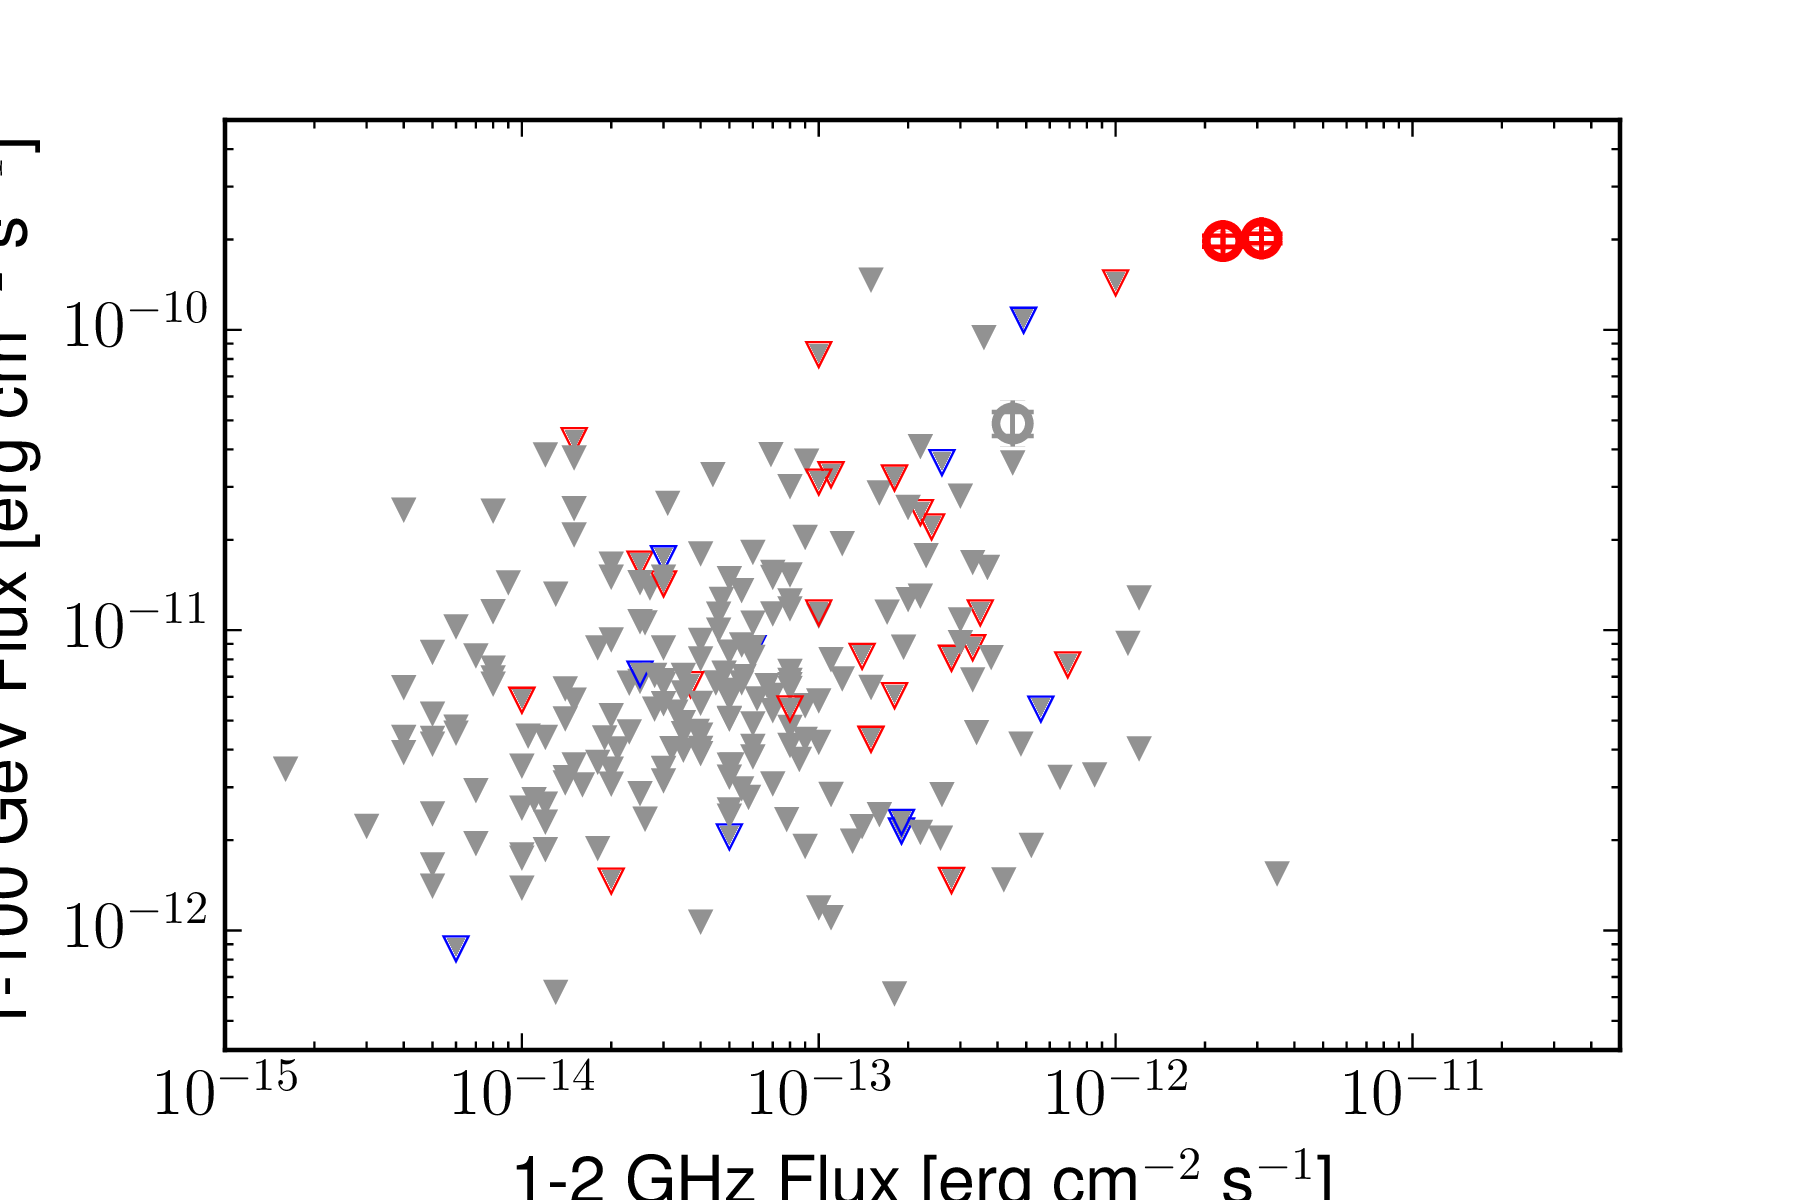

In [14]:
# #Some of the interesting figures
# #I moved snrs3
# #from wand.image import Image as WImage
Image(filename='/Users/jmcohen/Dropbox/CurrentWork/SNR_MC/W28_W44_HB3_SED/makePlots_snrs3/radio_vs_gamma_flux_ULs.png', height = 700,width =700)


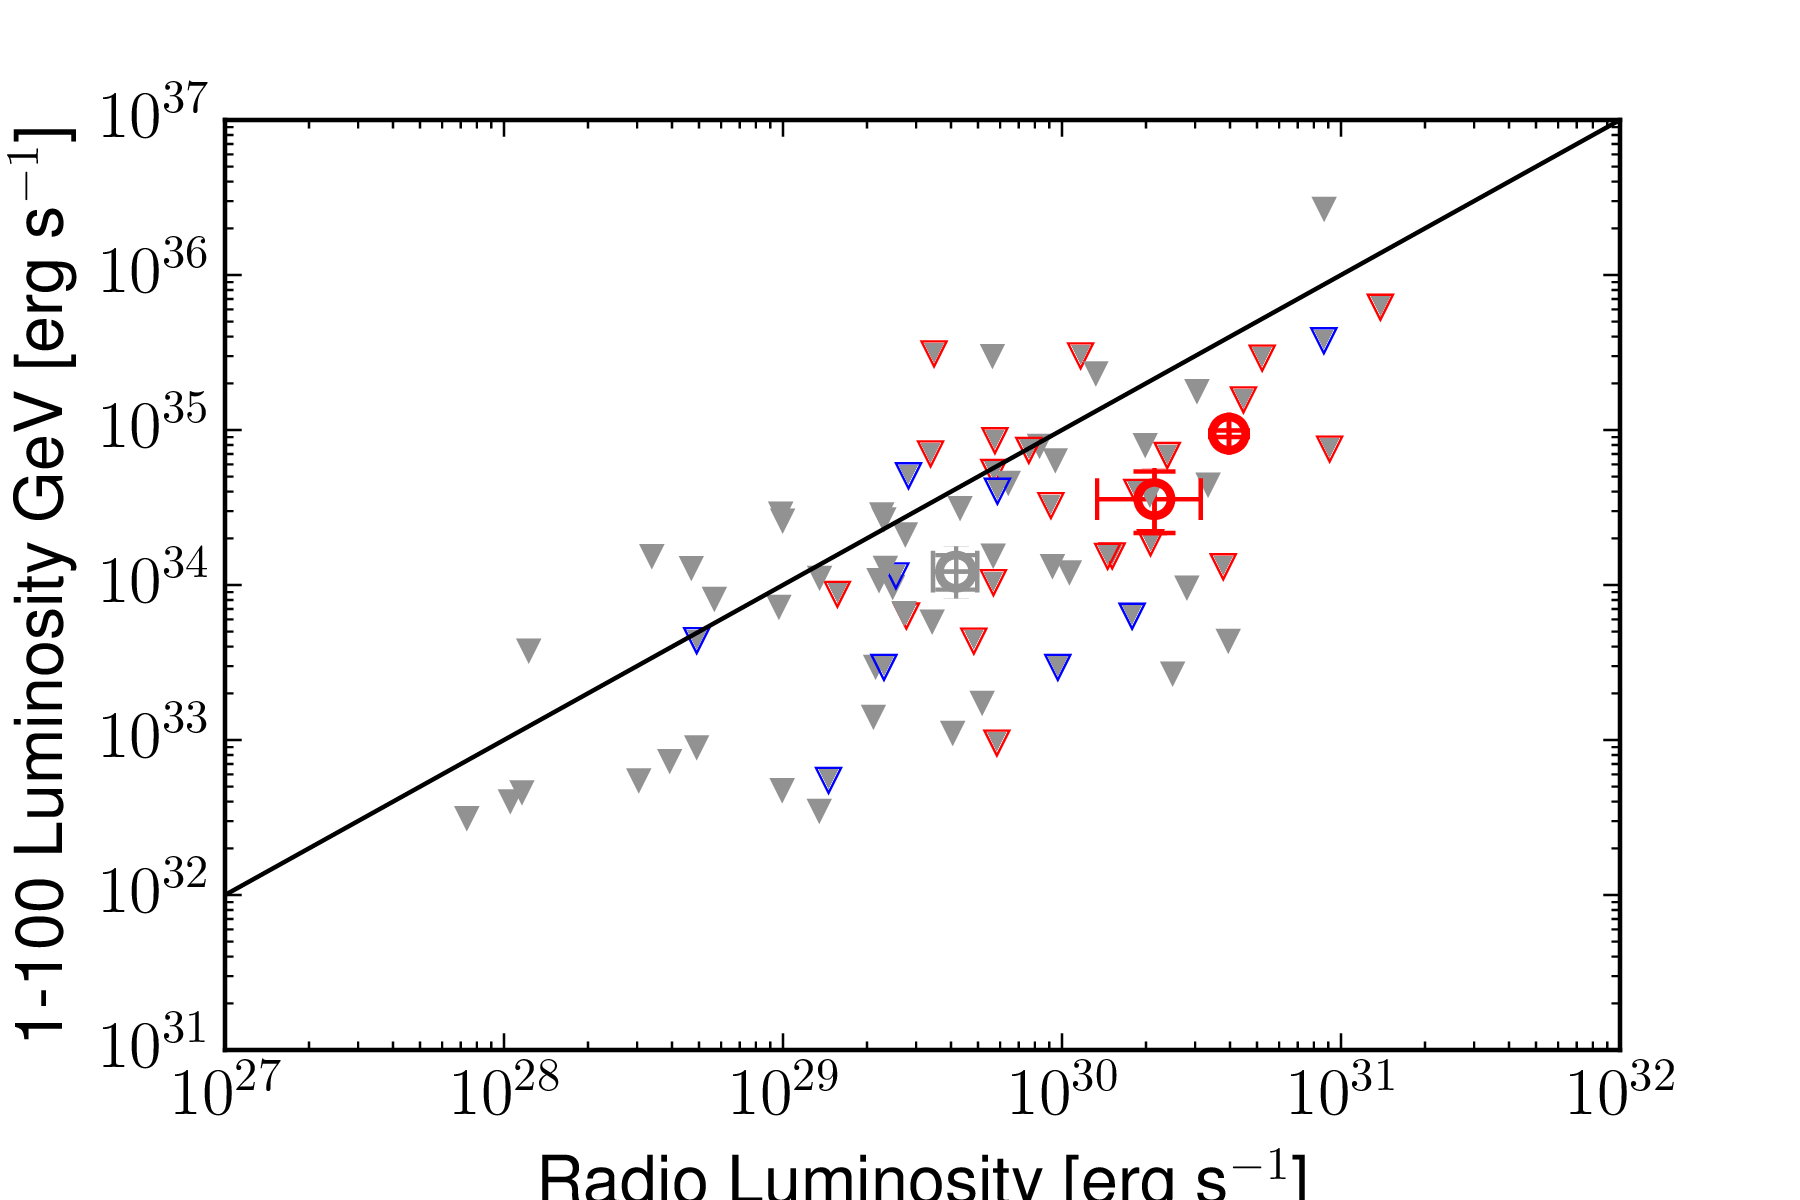

In [17]:
Image(filename='/Users/jmcohen/Dropbox/CurrentWork/SNR_MC/W28_W44_HB3_SED/makePlots_snrs3/radio_vs_gamma_lum_ULs.png', height = 700,width =700)

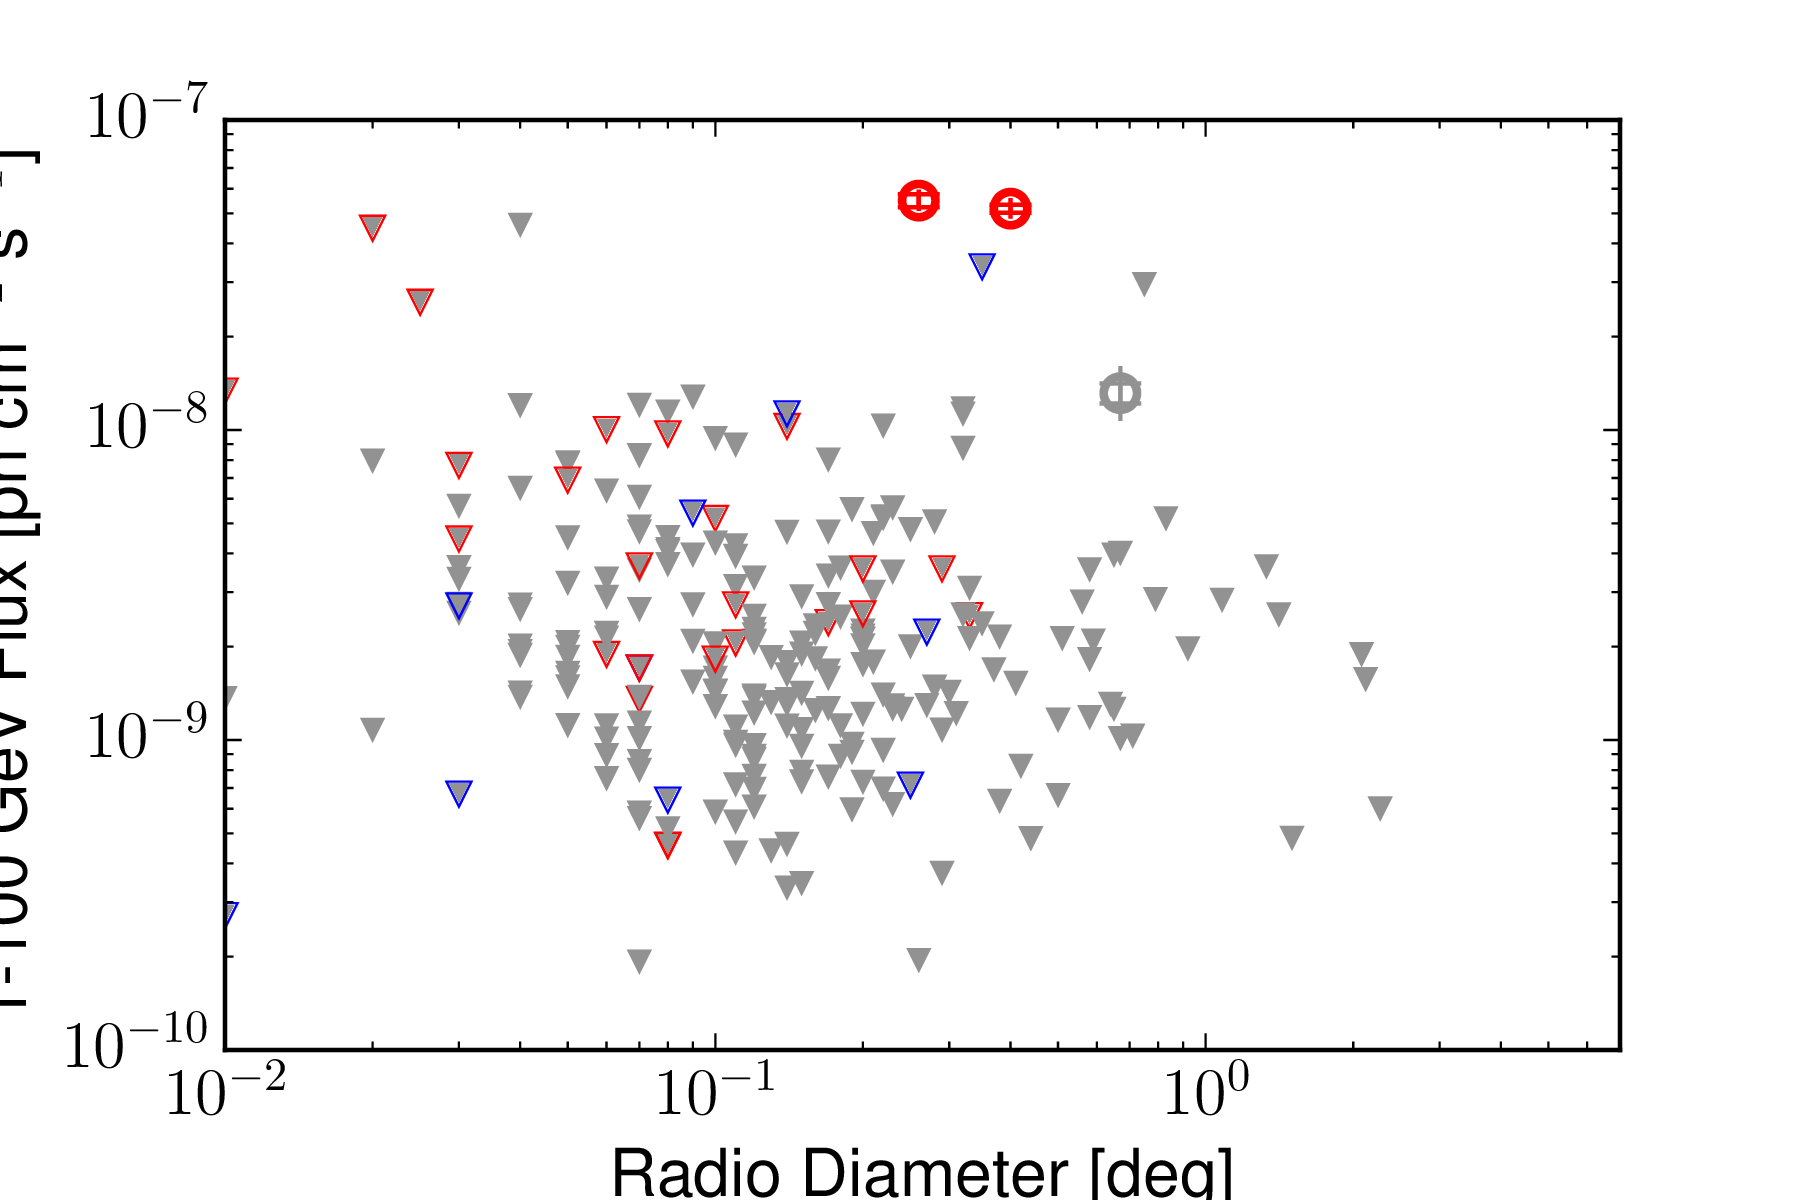

In [19]:
Image(filename='/Users/jmcohen/Dropbox/CurrentWork/SNR_MC/W28_W44_HB3_SED/makePlots_snrs3/flux_vs_angsize.png', height = 700,width =700)

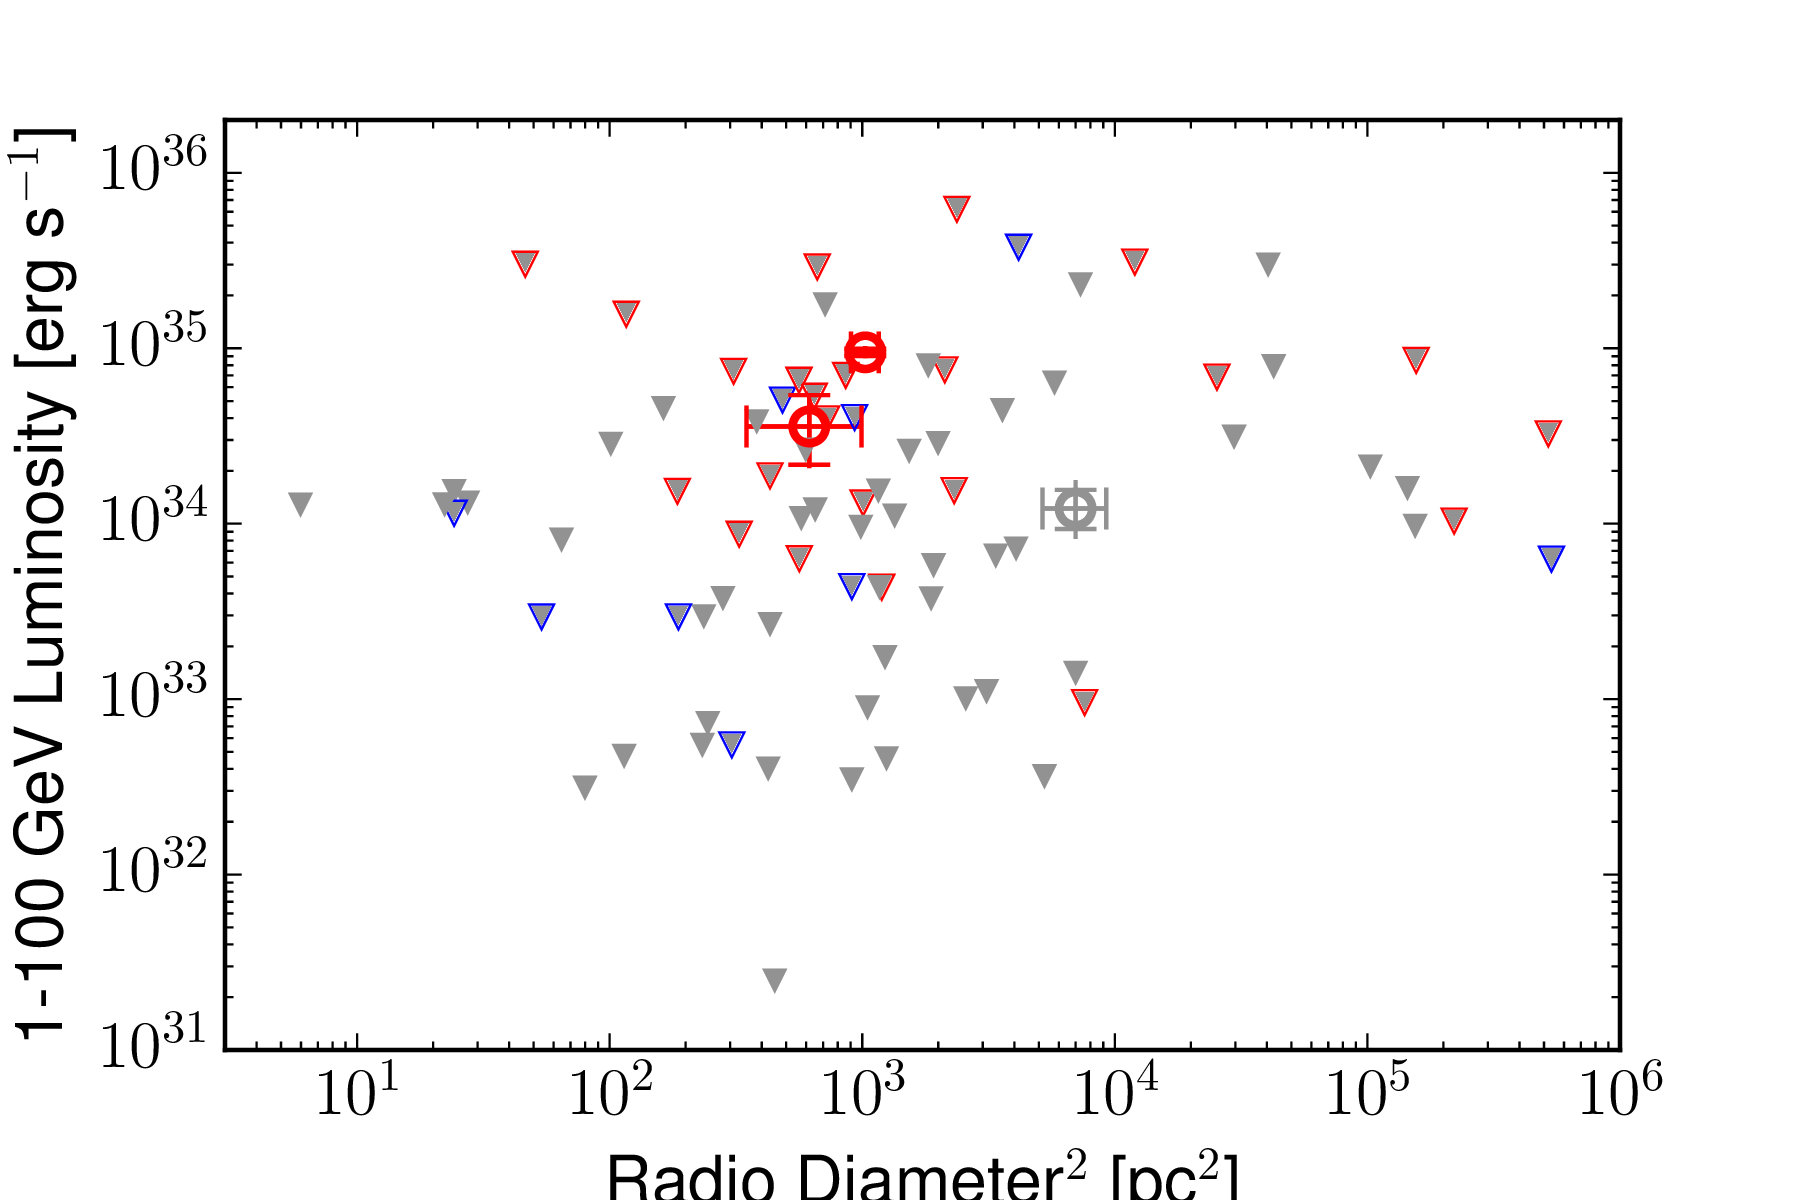

In [18]:
Image(filename='/Users/jmcohen/Dropbox/CurrentWork/SNR_MC/W28_W44_HB3_SED/makePlots_snrs3/lum_vs_dia2_ULs.png', height = 700,width =700)

# SED

**Do we need radio & X-ray right now?**

In [8]:
#CTA/HESS/LAT sensitivities
#http://arxiv.org/pdf/1205.0832.pdf
wSens = True
sensDir = "/Users/jmcohen/Desktop/gammaRayTele_sensitivities/"

hess100 = os.path.join(sensDir,"HESS_100hrs_sens_erg_MeV.txt")
CTA100 = os.path.join(sensDir,"CTA_100hrs_sens_erg_MeV.txt")
CTA1000 = os.path.join(sensDir,"CTA_100hrs_sens_erg_MeV.txt")
LAT10yrIG = os.path.join(sensDir,"LAT_10yr_innerGal_sens_erg_MeV.txt")
####
hess100Tab = Table.read(hess100, format = 'ascii')
CTA100Tab = Table.read(CTA100, format = 'ascii')
CTA1000Tab = Table.read(CTA1000, format = 'ascii')
LAT10yrIGTab = Table.read(LAT10yrIG, format = 'ascii')
####convert from MeV to GeV
hess100Tab['x'] = hess100Tab['x'] / 1.e3
CTA100Tab['x'] = CTA100Tab['x'] / 1.e3
CTA1000Tab['x'] = CTA1000Tab['x'] / 1.e3
LAT10yrIGTab['x'] = LAT10yrIGTab['x'] / 1.e3

In [4]:
evflx  = u.eV / (u.cm ** 2 * u.s)
ergflx = u.erg / (u.cm ** 2 * u.s)
evEn = u.eV
ergEn = u.erg
ul_fraction = 0.4
###load in data for W44
w44Dir = '/Users/jmcohen/Dropbox/CurrentWork/SNR_MC/W28_W44_HB3_SED/sed/W44'

HB3Dir = '/Users/jmcohen/Dropbox/CurrentWork/SNR_MC/W28_W44_HB3_SED/sed/HB3'
####Plot everything in erg/cm^2/s vs eV (was going to Gev but I think it's in eV already)
w44_radio  = os.path.join(w44Dir,'W44_Radio.txt') #UNITS: erg/ eV
w44_latUL = os.path.join(w44Dir,'W44_LAT_pion_ULs.txt') #UNITS: erg/ eV
w44_lat = os.path.join(w44Dir,'W44_LAT_pion.txt') #UNITS: erg/ eV
w44_tevUL = os.path.join(w44Dir,'W44_TeV_UL.txt') #UNITS:  erg/ eV
#w44_tev = os.path.join(w44Dir,'W44_LAT_pion.txt') only UL for W44 #UNITS: erg/ eV
w44_src1 = os.path.join(w44Dir,'W44_SRC1_ergcms_eV.txt') 
w44_src1UL = os.path.join(w44Dir,'W44_SRC1_ergcms_eV_UL.txt')
w44_src2 = os.path.join(w44Dir,'W44_SRC2_ergcms_eV.txt')
w44_src2UL = os.path.join(w44Dir,'W44_SRC2_ergcms_eV_UL.txt')
w44_src12 = os.path.join(w44Dir,'W44_SRC1+2_ergcms_eV.txt')
w44_src12UL = os.path.join(w44Dir,'W44_SRC1+2_ergcms_eV_UL.txt')
w44_newSrc1 = os.path.join(w44Dir,'newW44Src1.txt') #UNITS x:MeV, y: MeV * ph/cm^2/s

w44_radioTab = Table.read(w44_radio, format = 'ascii')
w44_latULTab = Table.read(w44_latUL, format = 'ascii')
w44_latTab = Table.read(w44_lat, format = 'ascii')
w44_tevULTab = Table.read(w44_tevUL, format = 'ascii')
#w44_tevTab = Table.read(#w44_tev, format = 'ascii')
w44_src1Tab = Table.read(w44_src1, format = 'ascii')
w44_src1ULTab = Table.read(w44_src1UL, format = 'ascii')
w44_src2Tab = Table.read(w44_src2, format = 'ascii')
w44_src2ULTab = Table.read(w44_src2UL, format = 'ascii')
w44_src12Tab = Table.read(w44_src12, format = 'ascii')
w44_src12ULTab = Table.read(w44_src12UL, format = 'ascii')
w44_newSrc1Tab = Table.read(w44_newSrc1, format = 'ascii')

In [5]:
#convert W44 x from eV to GeV
w44_radioTab['x'] = w44_radioTab['x'] / 1.e9
w44_latULTab['x'] = w44_latULTab['x'] / 1.e9
w44_latTab['x'] = w44_latTab['x'] / 1.e9
w44_tevULTab['x'] = w44_tevULTab['x'] / 1.e9
#w44_tevTab['x'] = w44_tevTab['x'] / 1.e9
w44_src1Tab['x'] = w44_src1Tab['x'] / 1.e9
w44_src1ULTab['x'] = w44_src1ULTab['x'] / 1.e9
w44_src2Tab['x'] = w44_src2Tab['x'] / 1.e9
w44_src2ULTab['x'] = w44_src2ULTab['x'] / 1.e9
w44_src12Tab['x'] = w44_src12Tab['x'] / 1.e9
w44_src12ULTab['x'] = w44_src12ULTab['x'] / 1.e9
#convert new W44 SRC1 from UNITS x:MeV to GeV, y: MeV * ph/cm^2/s to erg * ph/cm^2/s to 
w44_newSrc1Tab['x'] = w44_newSrc1Tab['x'] / 1.e3
w44_newSrc1Tab['y'] = w44_newSrc1Tab['y'] * 1.60217657*1e-6


In [6]:
#load in data for W28
w28Dir = '/Users/jmcohen/Dropbox/CurrentWork/SNR_MC/W28_W44_HB3_SED/sed/W28'
####for W28 all in ev/cm^2/s vs GeV
#convert to erg/cm^2/s vs eV? or W44 to TeV
w28_radio_N  = os.path.join(w28Dir,'W28_radio_north_evcms_ev.txt')
w28_radio_S  = os.path.join(w28Dir,'W28_radio_south_evcms_ev.txt')
w28_GeV_N = os.path.join(w28Dir,'W28N_LAT_TeV_evcms_GeV.txt')# this is both GeV and TeV
w28_GeV_N_UL = os.path.join(w28Dir,'W28N_LAT_TeV_evcms_GeV_UL.txt')# this is both GeV and TeV
w28_GeV_S_68conf = os.path.join(w28Dir,'W28S_LAT_evcms_GeV.txt')
w28_GeV_A_68conf = os.path.join(w28Dir,'HESSJ1800-240A_LAT_evcms_GeV_68conf.txt')
w28_GeV_B_68conf = os.path.join(w28Dir,'HESSJ1800-240B_LAT_evcms_GeV_68conf.txt')
w28_GeV_C_68conf = os.path.join(w28Dir,'HESSJ1800-240C_LAT_evcms_GeV_68conf.txt')
w28_GeV_W_68conf = os.path.join(w28Dir,'HESSJ1800-240W_LAT_evcms_GeV_68conf.txt')
w28_GeV_A_sys = os.path.join(w28Dir,'HESSJ1800-240A_LAT_evcms_GeV_SysErr.txt')
w28_GeV_B_sys = os.path.join(w28Dir,'HESSJ1800-240B_LAT_evcms_GeV_SysErr.txt')
w28_GeV_C_sys = os.path.join(w28Dir,'HESSJ1800-240C_LAT_evcms_GeV_SysErr.txt')
w28_GeV_W_sys = os.path.join(w28Dir,'HESSJ1800-240W_LAT_evcms_GeV_SysErr.txt')

w28_TeV_A = os.path.join(w28Dir, 'HESSJ1800-240A_TeV_evcms_GeV.txt')
w28_TeV_B = os.path.join(w28Dir, 'HESSJ1800-240B_TeV_evcms_GeV.txt')
w28_TeV_C = os.path.join(w28Dir, 'HESSJ1800-240C_TeV_evcms_GeV.txt')
w28_TeV_S = os.path.join(w28Dir, 'W28S_TeV_evcms_GeV.txt')
w28_TeV_A_UL = os.path.join(w28Dir, 'HESSJ1800-240A_TeV_evcms_GeV_UL.txt')
w28_TeV_B_UL = os.path.join(w28Dir, 'HESSJ1800-240B_TeV_evcms_GeV_UL.txt')
w28_TeV_C_UL = os.path.join(w28Dir, 'HESSJ1800-240C_TeV_evcms_GeV_UL.txt')
w28_TeV_S_UL = os.path.join(w28Dir, 'W28S_TeV_evcms_GeV_UL.txt')
w28_TeV_W_UL = os.path.join(w28Dir, 'HESSJ1800-240W_TeV_evcms_GeV_UL.txt')

#w28_TeV_W = os.path.join(w28Dir,'W44_SRC1+2_ergcms_eV_UL.txt') #only uppper limit
w28_radio_NTab = Table.read(w28_radio_N, format = 'ascii')
w28_radio_STab = Table.read(w28_radio_S, format = 'ascii')
w28_GeV_NTab = Table.read(w28_GeV_N, format = 'ascii') #This is both LAT and TeV
w28_GeV_N_ULTab = Table.read(w28_GeV_N_UL, format = 'ascii') #This is both LAT and TeV
w28_GeV_S_68confTab = Table.read(w28_GeV_S_68conf, format = 'ascii')
w28_GeV_A_68confTab = Table.read(w28_GeV_A_68conf, format = 'ascii')
w28_GeV_B_68confTab = Table.read(w28_GeV_B_68conf, format = 'ascii')
w28_GeV_C_68confTab = Table.read(w28_GeV_C_68conf, format = 'ascii')
w28_GeV_W_68confTab = Table.read(w28_GeV_W_68conf, format = 'ascii')
w28_GeV_A_sysTab = Table.read(w28_GeV_A_sys, format = 'ascii')
w28_GeV_B_sysTab = Table.read(w28_GeV_B_sys, format = 'ascii')
w28_GeV_C_sysTab = Table.read(w28_GeV_C_sys, format = 'ascii')
w28_GeV_W_sysTab = Table.read(w28_GeV_W_sys, format = 'ascii')

w28_TeV_ATab = Table.read(w28_TeV_A, format = 'ascii')
w28_TeV_BTab = Table.read(w28_TeV_B, format = 'ascii')
w28_TeV_CTab = Table.read(w28_TeV_C, format = 'ascii')
w28_TeV_STab = Table.read(w28_TeV_S,  format = 'ascii')
w28_TeV_A_ULTab = Table.read(w28_TeV_A_UL, format = 'ascii')
w28_TeV_B_ULTab = Table.read(w28_TeV_B_UL, format = 'ascii')
w28_TeV_C_ULTab = Table.read(w28_TeV_C_UL, format = 'ascii')
w28_TeV_S_ULTab = Table.read(w28_TeV_S_UL, format = 'ascii')
w28_TeV_W_ULTab = Table.read(w28_TeV_W_UL , format = 'ascii')

In [7]:
w28_radio_NTab['y'] = w28_radio_NTab['y'] * 1.60217646e-12
w28_radio_STab['y'] = w28_radio_STab['y'] * 1.60217646e-12
w28_GeV_NTab['y'] = w28_GeV_NTab['y'] * 1.60217646e-12
w28_GeV_N_ULTab['y'] = w28_GeV_N_ULTab['y'] * 1.60217646e-12
w28_GeV_S_68confTab['y'] = w28_GeV_S_68confTab['y'] * 1.60217646e-12
w28_GeV_A_68confTab['y'] = w28_GeV_A_68confTab['y'] * 1.60217646e-12
w28_GeV_B_68confTab['y'] = w28_GeV_B_68confTab['y'] * 1.60217646e-12
w28_GeV_C_68confTab['y'] = w28_GeV_C_68confTab['y'] * 1.60217646e-12
w28_GeV_W_68confTab['y'] = w28_GeV_W_68confTab['y'] * 1.60217646e-12
w28_GeV_A_sysTab['y'] = w28_GeV_A_sysTab['y'] * 1.60217646e-12
w28_GeV_B_sysTab['y'] = w28_GeV_B_sysTab['y'] * 1.60217646e-12
w28_GeV_C_sysTab['y'] = w28_GeV_C_sysTab['y'] * 1.60217646e-12
w28_GeV_W_sysTab['y'] = w28_GeV_W_sysTab['y'] * 1.60217646e-12
w28_TeV_ATab['y'] = w28_TeV_ATab['y'] * 1.60217646e-12
w28_TeV_BTab['y'] = w28_TeV_BTab['y'] * 1.60217646e-12
w28_TeV_CTab['y'] = w28_TeV_CTab['y'] * 1.60217646e-12
w28_TeV_STab['y'] = w28_TeV_STab['y'] * 1.60217646e-12
w28_TeV_A_ULTab['y'] = w28_TeV_A_ULTab['y'] * 1.60217646e-12
w28_TeV_B_ULTab['y'] = w28_TeV_B_ULTab['y'] * 1.60217646e-12
w28_TeV_C_ULTab['y'] = w28_TeV_C_ULTab['y'] * 1.60217646e-12
w28_TeV_S_ULTab['y'] = w28_TeV_S_ULTab['y'] * 1.60217646e-12
w28_TeV_W_ULTab['y'] = w28_TeV_W_ULTab['y'] * 1.60217646e-12

w28_GeV_NTab['dy-'] = w28_GeV_NTab['dy-'] * 1.60217646e-12

w28_TeV_ATab['dy-'] = w28_TeV_ATab['dy-'] * 1.60217646e-12
w28_TeV_BTab['dy-'] = w28_TeV_BTab['dy-'] * 1.60217646e-12
w28_TeV_CTab['dy-'] = w28_TeV_CTab['dy-'] * 1.60217646e-12
w28_TeV_STab['dy-'] = w28_TeV_STab['dy-'] * 1.60217646e-12
w28_GeV_NTab['dy+'] = w28_GeV_NTab['dy+'] * 1.60217646e-12

w28_TeV_ATab['dy+'] = w28_TeV_ATab['dy+'] * 1.60217646e-12
w28_TeV_BTab['dy+'] = w28_TeV_BTab['dy+'] * 1.60217646e-12
w28_TeV_CTab['dy+'] = w28_TeV_CTab['dy+'] * 1.60217646e-12
w28_TeV_STab['dy+'] = w28_TeV_STab['dy+'] * 1.60217646e-12

## Plots!

In [1]:
# #Just the SNRs
# plt.figure(figsize=[10,8])
# #W44 LAT
# plt.errorbar(w44_latTab['x'],w44_latTab['y'], yerr = [-w44_latTab['dy-'],w44_latTab['dy+']] ,color = 'DarkOrange', marker = 'o' , ls ='none',label = 'W44')
# plt.errorbar(w44_latULTab['x'], w44_latULTab['y'] , yerr = [ul_fraction*w44_latULTab['y'],np.zeros_like(w44_latULTab['y'], dtype=float)] ,color = 'DarkOrange', marker ='o',ls ='none', capsize = 0)
# plt.errorbar(w44_latULTab['x'], w44_latULTab['y'] ,color = 'DarkOrange', marker ='o',ls = 'none')
# plt.plot(w44_latULTab['x'], (1-ul_fraction)*w44_latULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = 'DarkOrange')
# #W44 TeV
# plt.errorbar(w44_tevULTab['x'], w44_tevULTab['y'] , yerr = [ul_fraction*w44_tevULTab['y'],np.zeros_like(w44_tevULTab['y'], dtype=float)] ,color = 'DarkOrange', marker ='o',ls ='none', capsize = 0)
# plt.errorbar(w44_tevULTab['x'], w44_tevULTab['y'] ,color = 'DarkOrange', marker ='o',ls = 'none')
# plt.plot(w44_tevULTab['x'], (1-ul_fraction)*w44_tevULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = 'DarkOrange')
# #W28
# #North
# plt.errorbar(w28_GeV_NTab['x'],w28_GeV_NTab['y'], yerr = [-w28_GeV_NTab['dy-'],w28_GeV_NTab['dy+']] ,color = 'DarkOrchid', marker = 's' , ls ='none',label = 'W28  North')
# plt.errorbar(w28_GeV_N_ULTab['x'], w28_GeV_N_ULTab['y'] , yerr = [ul_fraction*w28_GeV_N_ULTab['y'],np.zeros_like(w28_GeV_N_ULTab['y'], dtype=float)] ,color = 'DarkOrchid', marker ='s',ls ='none', capsize = 0)
# plt.errorbar(w28_GeV_N_ULTab['x'], w28_GeV_N_ULTab['y'] ,color = 'DarkOrchid', marker ='s',ls = 'none')
# plt.plot(w28_GeV_N_ULTab['x'], (1-ul_fraction)*w28_GeV_N_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = 'DarkOrchid')
# #South GeV
# plt.plot(w28_GeV_S_68confTab['x'], w28_GeV_S_68confTab['y'] ,ls = '-',color = 'DarkGreen')

# #South TeV
# plt.errorbar(w28_TeV_STab['x'],w28_TeV_STab['y'], yerr = [-w28_TeV_STab['dy-'],w28_TeV_STab['dy+']] ,color = 'DarkGreen', marker = 's' , ls ='none',label = 'W28  South')
# plt.errorbar(w28_TeV_S_ULTab['x'], w28_TeV_S_ULTab['y'] , yerr = [ul_fraction*w28_TeV_S_ULTab['y'],np.zeros_like(w28_TeV_S_ULTab['y'], dtype=float)] ,color = 'DarkGreen', marker ='s',ls ='none', capsize = 0)
# plt.errorbar(w28_TeV_S_ULTab['x'], w28_TeV_S_ULTab['y'] ,color = 'DarkGreen', marker ='s',ls = 'none')
# plt.plot(w28_TeV_S_ULTab['x'], (1-ul_fraction)*w28_TeV_S_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = 'DarkGreen')

# plt.loglog()
# plt.xlabel('Energy [GeV]')
# plt.ylabel('E$^{2}$ dN/dE (erg cm$^{-2}$ s$^{-1}$)')
# plt.title('W44 and W28')
# plt.legend(loc = 'best')

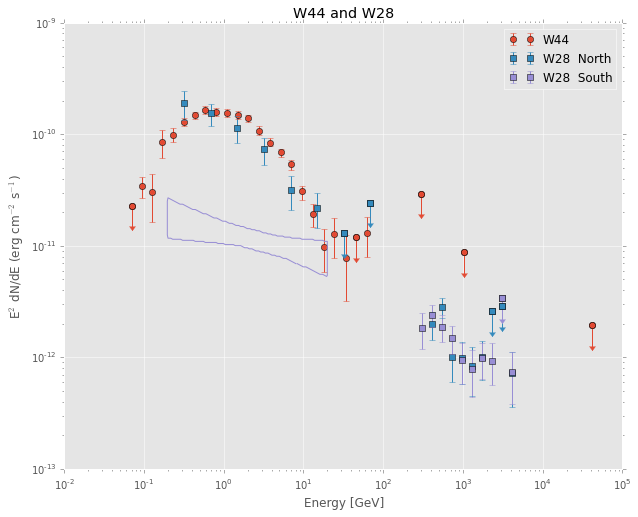

In [10]:
#try default color schem with ggplot
plt.figure(figsize=[10,8])
ncolors = plt.rcParams['axes.color_cycle'] #get colors from default color cycle
#Just the SNRs
plt.figure(figsize=[10,8])
#W44
plt.errorbar(w44_latTab['x'],w44_latTab['y'], yerr = [-w44_latTab['dy-'],w44_latTab['dy+']] ,color = ncolors[0], marker = 'o' , ls ='none',label = 'W44')
plt.errorbar(w44_latULTab['x'], w44_latULTab['y'] , yerr = [ul_fraction*w44_latULTab['y'],np.zeros_like(w44_latULTab['y'], dtype=float)] ,color = ncolors[0], marker ='o',ls ='none', capsize = 0)
plt.errorbar(w44_latULTab['x'], w44_latULTab['y'] ,color = ncolors[0], marker ='o',ls = 'none')
plt.plot(w44_latULTab['x'], (1-ul_fraction)*w44_latULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[0])
#W44 TeV
plt.errorbar(w44_tevULTab['x'], w44_tevULTab['y'] , yerr = [ul_fraction*w44_tevULTab['y'],np.zeros_like(w44_tevULTab['y'], dtype=float)] ,color = ncolors[0], marker ='o',ls ='none', capsize = 0)
plt.errorbar(w44_tevULTab['x'], w44_tevULTab['y'] ,color = ncolors[0], marker ='o',ls = 'none')
plt.plot(w44_tevULTab['x'], (1-ul_fraction)*w44_tevULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[0])
#W28
#North
plt.errorbar(w28_GeV_NTab['x'],w28_GeV_NTab['y'], yerr = [-w28_GeV_NTab['dy-'],w28_GeV_NTab['dy+']] ,color = ncolors[1], marker = 's' , ls ='none',label = 'W28  North')
plt.errorbar(w28_GeV_N_ULTab['x'], w28_GeV_N_ULTab['y'] , yerr = [ul_fraction*w28_GeV_N_ULTab['y'],np.zeros_like(w28_GeV_N_ULTab['y'], dtype=float)] ,color = ncolors[1], marker ='s',ls ='none', capsize = 0)
plt.errorbar(w28_GeV_N_ULTab['x'], w28_GeV_N_ULTab['y'] ,color = ncolors[1], marker ='s',ls = 'none')
plt.plot(w28_GeV_N_ULTab['x'], (1-ul_fraction)*w28_GeV_N_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[1])
#South GeV
plt.plot(w28_GeV_S_68confTab['x'], w28_GeV_S_68confTab['y'] ,ls = '-',color = ncolors[2])

#South TeV
plt.errorbar(w28_TeV_STab['x'],w28_TeV_STab['y'], yerr = [-w28_TeV_STab['dy-'],w28_TeV_STab['dy+']] ,color = ncolors[2], marker = 's' , ls ='none',label = 'W28  South')
plt.errorbar(w28_TeV_S_ULTab['x'], w28_TeV_S_ULTab['y'] , yerr = [ul_fraction*w28_TeV_S_ULTab['y'],np.zeros_like(w28_TeV_S_ULTab['y'], dtype=float)] ,color = ncolors[2], marker ='s',ls ='none', capsize = 0)
plt.errorbar(w28_TeV_S_ULTab['x'], w28_TeV_S_ULTab['y'] ,color = ncolors[2], marker ='s',ls = 'none')
plt.plot(w28_TeV_S_ULTab['x'], (1-ul_fraction)*w28_TeV_S_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[2])

plt.loglog()
plt.xlabel('Energy [GeV]')
plt.ylabel('E$^{2}$ dN/dE (erg cm$^{-2}$ s$^{-1}$)')
plt.title('W44 and W28')
plt.legend(loc = 'best')

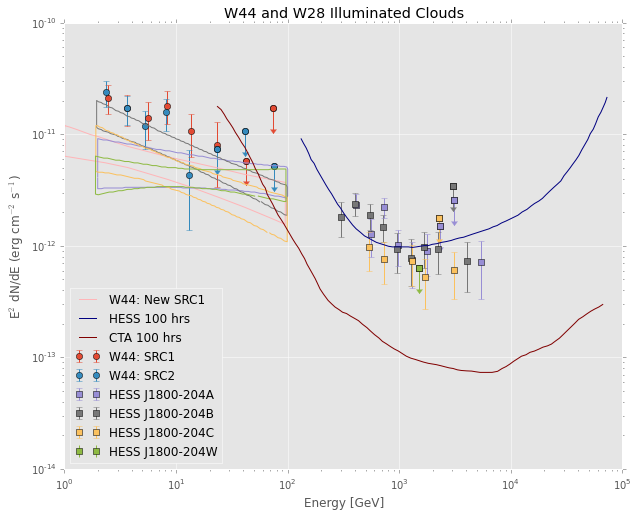

In [25]:
#next plot all MC sources
#W28 A/B/C/W (GeV/TeV)
plt.figure(figsize=[10,8])
ncolors = plt.rcParams['axes.color_cycle'] #get colors from default color cycle
#Just the SNRs
plt.figure(figsize=[10,8])
#W44 SRC1
plt.errorbar(w44_src1Tab['x'],w44_src1Tab['y'], yerr = [-w44_src1Tab['dy-'],w44_src1Tab['dy+']] ,color = ncolors[0], marker = 'o' , ls ='none',label = 'W44: SRC1')
plt.errorbar(w44_src1ULTab['x'], w44_src1ULTab['y'] , yerr = [ul_fraction*w44_src1ULTab['y'],np.zeros_like(w44_src1ULTab['y'], dtype=float)] ,color = ncolors[0], marker ='o',ls ='none', capsize = 0)
plt.errorbar(w44_src1ULTab['x'], w44_src1ULTab['y'] ,color = ncolors[0], marker ='o',ls = 'none')
plt.plot(w44_src1ULTab['x'], (1-ul_fraction)*w44_src1ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[0])
#W44 SRC2
plt.errorbar(w44_src2Tab['x'],w44_src2Tab['y'], yerr = [-w44_src2Tab['dy-'],w44_src2Tab['dy+']] ,color = ncolors[1], marker = 'o' , ls ='none',label = 'W44: SRC2')
plt.errorbar(w44_src2ULTab['x'], w44_src2ULTab['y'] , yerr = [ul_fraction*w44_src2ULTab['y'],np.zeros_like(w44_src2ULTab['y'], dtype=float)] ,color = ncolors[1], marker ='o',ls ='none', capsize = 0)
plt.errorbar(w44_src2ULTab['x'], w44_src2ULTab['y'] ,color = ncolors[1], marker ='o',ls = 'none')
plt.plot(w44_src2ULTab['x'], (1-ul_fraction)*w44_src2ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[1])
#W44 new SRC1
plt.plot(w44_newSrc1Tab['x'], w44_newSrc1Tab['y'] ,ls = '-',color = ncolors[6],label = 'W44: New SRC1')
#W44 SRC1+2
# plt.errorbar(w44_src12Tab['x'],w44_src12Tab['y'], yerr = [-w44_src12Tab['dy-'],w44_src12Tab['dy+']] ,color = 'DarkOrange', marker = '^' , ls ='none',label = 'W44: SRC1+2')
# plt.errorbar(w44_src12ULTab['x'], w44_src12ULTab['y'] , yerr = [ul_fraction*w44_src12ULTab['y'],np.zeros_like(w44_src12ULTab['y'], dtype=float)] ,color = 'DarkOrange', marker ='^',ls ='none', capsize = 0)
# plt.errorbar(w44_src12ULTab['x'], w44_src12ULTab['y'] ,color = 'DarkOrange', marker ='^',ls = 'none')
# plt.plot(w44_src12ULTab['x'], (1-ul_fraction)*w44_src12ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = 'DarkOrange')
#W28A TeV
plt.errorbar(w28_TeV_ATab['x'],w28_TeV_ATab['y'], yerr = [-w28_TeV_ATab['dy-'],w28_TeV_ATab['dy+']] ,color = ncolors[2], marker = 's' , ls ='none',label = 'HESS J1800-204A')
plt.errorbar(w28_TeV_A_ULTab['x'], w28_TeV_A_ULTab['y'] , yerr = [ul_fraction*w28_TeV_A_ULTab['y'],np.zeros_like(w28_TeV_A_ULTab['y'], dtype=float)] ,color = ncolors[2], marker ='s',ls ='none', capsize = 0)
plt.errorbar(w28_TeV_A_ULTab['x'], w28_TeV_A_ULTab['y'] ,color = ncolors[2], marker ='s',ls = 'none')
plt.plot(w28_TeV_A_ULTab['x'], (1-ul_fraction)*w28_TeV_A_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[2])
#W28A GeV sys and conf
#plt.plot(w28_GeV_A_68confTab['x'], w28_GeV_A_68confTab['y'] ,ls = '--',color = ncolors[2])
plt.plot(w28_GeV_A_sysTab['x'], w28_GeV_A_sysTab['y'] ,ls = '-',color = ncolors[2])
#W28B TeV
plt.errorbar(w28_TeV_BTab['x'],w28_TeV_BTab['y'], yerr = [-w28_TeV_BTab['dy-'],w28_TeV_BTab['dy+']] ,color = ncolors[3], marker = 's' , ls ='none',label = 'HESS J1800-204B')
plt.errorbar(w28_TeV_B_ULTab['x'], w28_TeV_B_ULTab['y'] , yerr = [ul_fraction*w28_TeV_B_ULTab['y'],np.zeros_like(w28_TeV_B_ULTab['y'], dtype=float)] ,color = ncolors[3], marker ='s',ls ='none', capsize = 0)
plt.errorbar(w28_TeV_B_ULTab['x'], w28_TeV_B_ULTab['y'] ,color = ncolors[3], marker ='s',ls = 'none')
plt.plot(w28_TeV_B_ULTab['x'], (1-ul_fraction)*w28_TeV_B_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[3])
#W28B GeV
plt.plot(w28_GeV_B_sysTab['x'], w28_GeV_B_sysTab['y'] ,ls = '-',color = ncolors[3])
#W28C TeV
plt.errorbar(w28_TeV_CTab['x'],w28_TeV_CTab['y'], yerr = [-w28_TeV_CTab['dy-'],w28_TeV_CTab['dy+']] ,color = ncolors[4], marker = 's' , ls ='none',label = 'HESS J1800-204C')
plt.errorbar(w28_TeV_C_ULTab['x'], w28_TeV_C_ULTab['y'] , yerr = [ul_fraction*w28_TeV_C_ULTab['y'],np.zeros_like(w28_TeV_C_ULTab['y'], dtype=float)] ,color = ncolors[4], marker ='s',ls ='none', capsize = 0)
plt.errorbar(w28_TeV_C_ULTab['x'], w28_TeV_C_ULTab['y'] ,color = ncolors[4], marker ='s',ls = 'none')
plt.plot(w28_TeV_C_ULTab['x'], (1-ul_fraction)*w28_TeV_C_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[4])
#W28C GeV
plt.plot(w28_GeV_C_sysTab['x'], w28_GeV_C_sysTab['y'] ,ls = '-',color = ncolors[4])
#W28W TeV
plt.errorbar(w28_TeV_W_ULTab['x'], w28_TeV_W_ULTab['y'] , yerr = [ul_fraction*w28_TeV_W_ULTab['y'],np.zeros_like(w28_TeV_W_ULTab['y'], dtype=float)] ,color = ncolors[5], marker ='s',ls ='none', capsize = 0, label = 'HESS J1800-204W')
plt.errorbar(w28_TeV_W_ULTab['x'], w28_TeV_W_ULTab['y'] ,color = ncolors[5], marker ='s',ls = 'none')
plt.plot(w28_TeV_W_ULTab['x'], (1-ul_fraction)*w28_TeV_W_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[5])
#W28W GeV
#### Soruce W is outside the boundary of the TeV emission, doesn't seem to be coincident with CO, and is at the western edge of the radio emission
#### but in Hanabata et al. 2014, they still suggest the emission can be explained by runaway CRs
#### Maybe the CR ionization paper doesn't say anyhting about source W since the papers came out around the  same time?
plt.plot(w28_GeV_W_sysTab['x'], w28_GeV_W_sysTab['y'] ,ls = '-',color = ncolors[5])
###wSens
if wSens:
    plt.plot(hess100Tab['x'], hess100Tab['y'] ,ls = '-',color = "navy",label = 'HESS 100 hrs')
    plt.plot(CTA100Tab['x'], CTA100Tab['y'] ,ls = '-',color = "maroon",label = 'CTA 100 hrs')
    #plt.plot(LAT10yrIGTab['x'], LAT10yrIGTab['y'] ,ls = '-',color = "maroon",label = 'LAT 10yr inner Galaxy')
plt.loglog()
plt.loglog()
plt.xlabel('Energy [GeV]')
plt.ylabel('E$^{2}$ dN/dE (erg cm$^{-2}$ s$^{-1}$)')
plt.title('W44 and W28 Illuminated Clouds')
plt.legend(loc = 'best')

#the A 68conf are not working right, is it because the coords need to be in the right order?
#should I add the estimate distance of each source from the shock? F ~ M_cl/d^2

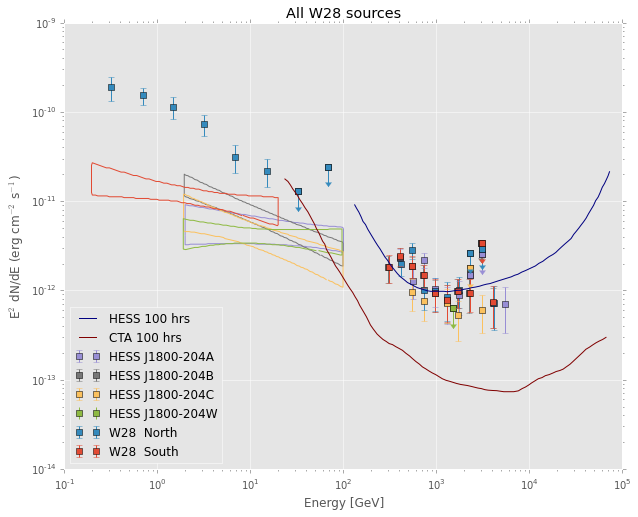

In [26]:
# Just W28 sources
#Is the spectrum of W28 consistent with it being escape of CRs vs crushed cloud or pre-existing CRs?
plt.figure(figsize=[10,8])
ncolors = plt.rcParams['axes.color_cycle'] #get colors from default color cycle
#Just the SNRs
plt.figure(figsize=[10,8])
#W28A TeV
plt.errorbar(w28_TeV_ATab['x'],w28_TeV_ATab['y'], yerr = [-w28_TeV_ATab['dy-'],w28_TeV_ATab['dy+']] ,color = ncolors[2], marker = 's' , ls ='none',label = 'HESS J1800-204A')
plt.errorbar(w28_TeV_A_ULTab['x'], w28_TeV_A_ULTab['y'] , yerr = [ul_fraction*w28_TeV_A_ULTab['y'],np.zeros_like(w28_TeV_A_ULTab['y'], dtype=float)] ,color = ncolors[2], marker ='s',ls ='none', capsize = 0)
plt.errorbar(w28_TeV_A_ULTab['x'], w28_TeV_A_ULTab['y'] ,color = ncolors[2], marker ='s',ls = 'none')
plt.plot(w28_TeV_A_ULTab['x'], (1-ul_fraction)*w28_TeV_A_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[2])
#W28A GeV sys and conf
#plt.plot(w28_GeV_A_68confTab['x'], w28_GeV_A_68confTab['y'] ,ls = '--',color = ncolors[2])
plt.plot(w28_GeV_A_sysTab['x'], w28_GeV_A_sysTab['y'] ,ls = '-',color = ncolors[2])
#W28B TeV
plt.errorbar(w28_TeV_BTab['x'],w28_TeV_BTab['y'], yerr = [-w28_TeV_BTab['dy-'],w28_TeV_BTab['dy+']] ,color = ncolors[3], marker = 's' , ls ='none',label = 'HESS J1800-204B')
plt.errorbar(w28_TeV_B_ULTab['x'], w28_TeV_B_ULTab['y'] , yerr = [ul_fraction*w28_TeV_B_ULTab['y'],np.zeros_like(w28_TeV_B_ULTab['y'], dtype=float)] ,color = ncolors[3], marker ='s',ls ='none', capsize = 0)
plt.errorbar(w28_TeV_B_ULTab['x'], w28_TeV_B_ULTab['y'] ,color = ncolors[3], marker ='s',ls = 'none')
plt.plot(w28_TeV_B_ULTab['x'], (1-ul_fraction)*w28_TeV_B_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[3])
#W28B GeV
plt.plot(w28_GeV_B_sysTab['x'], w28_GeV_B_sysTab['y'] ,ls = '-',color = ncolors[3])
#W28C TeV
plt.errorbar(w28_TeV_CTab['x'],w28_TeV_CTab['y'], yerr = [-w28_TeV_CTab['dy-'],w28_TeV_CTab['dy+']] ,color = ncolors[4], marker = 's' , ls ='none',label = 'HESS J1800-204C')
plt.errorbar(w28_TeV_C_ULTab['x'], w28_TeV_C_ULTab['y'] , yerr = [ul_fraction*w28_TeV_C_ULTab['y'],np.zeros_like(w28_TeV_C_ULTab['y'], dtype=float)] ,color = ncolors[4], marker ='s',ls ='none', capsize = 0)
plt.errorbar(w28_TeV_C_ULTab['x'], w28_TeV_C_ULTab['y'] ,color = ncolors[4], marker ='s',ls = 'none')
plt.plot(w28_TeV_C_ULTab['x'], (1-ul_fraction)*w28_TeV_C_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[4])
#W28C GeV
plt.plot(w28_GeV_C_sysTab['x'], w28_GeV_C_sysTab['y'] ,ls = '-',color = ncolors[4])
#W28W TeV
plt.errorbar(w28_TeV_W_ULTab['x'], w28_TeV_W_ULTab['y'] , yerr = [ul_fraction*w28_TeV_W_ULTab['y'],np.zeros_like(w28_TeV_W_ULTab['y'], dtype=float)] ,color = ncolors[5], marker ='s',ls ='none', capsize = 0, label = 'HESS J1800-204W')
plt.errorbar(w28_TeV_W_ULTab['x'], w28_TeV_W_ULTab['y'] ,color = ncolors[5], marker ='s',ls = 'none')
plt.plot(w28_TeV_W_ULTab['x'], (1-ul_fraction)*w28_TeV_W_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[5])
#W28W GeV
#### Soruce W is outside the boundary of the TeV emission, doesn't seem to be coincident with CO, and is at the western edge of the radio emission
#### but in Hanabata et al. 2014, they still suggest the emission can be explained by runaway CRs
#### Maybe the CR ionization paper doesn't say anyhting about source W since the papers came out around the  same time?
plt.plot(w28_GeV_W_sysTab['x'], w28_GeV_W_sysTab['y'] ,ls = '-',color = ncolors[5])
###
#W28
#North
plt.errorbar(w28_GeV_NTab['x'],w28_GeV_NTab['y'], yerr = [-w28_GeV_NTab['dy-'],w28_GeV_NTab['dy+']] ,color = ncolors[1], marker = 's' , ls ='none',label = 'W28  North')
plt.errorbar(w28_GeV_N_ULTab['x'], w28_GeV_N_ULTab['y'] , yerr = [ul_fraction*w28_GeV_N_ULTab['y'],np.zeros_like(w28_GeV_N_ULTab['y'], dtype=float)] ,color = ncolors[1], marker ='s',ls ='none', capsize = 0)
plt.errorbar(w28_GeV_N_ULTab['x'], w28_GeV_N_ULTab['y'] ,color = ncolors[1], marker ='s',ls = 'none')
plt.plot(w28_GeV_N_ULTab['x'], (1-ul_fraction)*w28_GeV_N_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[1])
#South GeV
plt.plot(w28_GeV_S_68confTab['x'], w28_GeV_S_68confTab['y'] ,ls = '-',color = ncolors[0])

#South TeV
plt.errorbar(w28_TeV_STab['x'],w28_TeV_STab['y'], yerr = [-w28_TeV_STab['dy-'],w28_TeV_STab['dy+']] ,color = ncolors[0], marker = 's' , ls ='none',label = 'W28  South')
plt.errorbar(w28_TeV_S_ULTab['x'], w28_TeV_S_ULTab['y'] , yerr = [ul_fraction*w28_TeV_S_ULTab['y'],np.zeros_like(w28_TeV_S_ULTab['y'], dtype=float)] ,color = ncolors[0], marker ='s',ls ='none', capsize = 0)
plt.errorbar(w28_TeV_S_ULTab['x'], w28_TeV_S_ULTab['y'] ,color = ncolors[0], marker ='s',ls = 'none')
plt.plot(w28_TeV_S_ULTab['x'], (1-ul_fraction)*w28_TeV_S_ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[0])
#wSens
if wSens:
    plt.plot(hess100Tab['x'], hess100Tab['y'] ,ls = '-',color = "navy",label = 'HESS 100 hrs')
    plt.plot(CTA100Tab['x'], CTA100Tab['y'] ,ls = '-',color = "maroon",label = 'CTA 100 hrs')
    #plt.plot(LAT10yrIGTab['x'], LAT10yrIGTab['y'] ,ls = '-',color = "maroon",label = 'LAT 10yr inner Galaxy')
plt.loglog()
plt.xlabel('Energy [GeV]')
plt.ylabel('E$^{2}$ dN/dE (erg cm$^{-2}$ s$^{-1}$)')
plt.title('All W28 sources ')
plt.legend(loc = 'best')

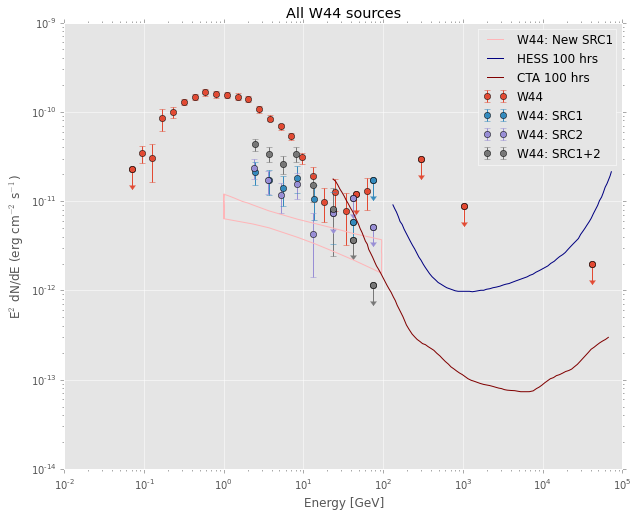

In [27]:
#Just W44
#try default color schem with ggplot
plt.figure(figsize=[10,8])
ncolors = plt.rcParams['axes.color_cycle'] #get colors from default color cycle
#Just the SNRs
plt.figure(figsize=[10,8])
#W44
plt.errorbar(w44_latTab['x'],w44_latTab['y'], yerr = [-w44_latTab['dy-'],w44_latTab['dy+']] ,color = ncolors[0], marker = 'o' , ls ='none',label = 'W44')
plt.errorbar(w44_latULTab['x'], w44_latULTab['y'] , yerr = [ul_fraction*w44_latULTab['y'],np.zeros_like(w44_latULTab['y'], dtype=float)] ,color = ncolors[0], marker ='o',ls ='none', capsize = 0)
plt.errorbar(w44_latULTab['x'], w44_latULTab['y'] ,color = ncolors[0], marker ='o',ls = 'none')
plt.plot(w44_latULTab['x'], (1-ul_fraction)*w44_latULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[0])
#W44 TeV
plt.errorbar(w44_tevULTab['x'], w44_tevULTab['y'] , yerr = [ul_fraction*w44_tevULTab['y'],np.zeros_like(w44_tevULTab['y'], dtype=float)] ,color = ncolors[0], marker ='o',ls ='none', capsize = 0)
plt.errorbar(w44_tevULTab['x'], w44_tevULTab['y'] ,color = ncolors[0], marker ='o',ls = 'none')
plt.plot(w44_tevULTab['x'], (1-ul_fraction)*w44_tevULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[0])
#W44 SRC1
plt.errorbar(w44_src1Tab['x'],w44_src1Tab['y'], yerr = [-w44_src1Tab['dy-'],w44_src1Tab['dy+']] ,color = ncolors[1], marker = 'o' , ls ='none',label = 'W44: SRC1')
plt.errorbar(w44_src1ULTab['x'], w44_src1ULTab['y'] , yerr = [ul_fraction*w44_src1ULTab['y'],np.zeros_like(w44_src1ULTab['y'], dtype=float)] ,color = ncolors[1], marker ='o',ls ='none', capsize = 0)
plt.errorbar(w44_src1ULTab['x'], w44_src1ULTab['y'] ,color = ncolors[1], marker ='o',ls = 'none')
plt.plot(w44_src1ULTab['x'], (1-ul_fraction)*w44_src1ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[1])
#W44 SRC2
plt.errorbar(w44_src2Tab['x'],w44_src2Tab['y'], yerr = [-w44_src2Tab['dy-'],w44_src2Tab['dy+']] ,color = ncolors[2], marker = 'o' , ls ='none',label = 'W44: SRC2')
plt.errorbar(w44_src2ULTab['x'], w44_src2ULTab['y'] , yerr = [ul_fraction*w44_src2ULTab['y'],np.zeros_like(w44_src2ULTab['y'], dtype=float)] ,color = ncolors[2], marker ='o',ls ='none', capsize = 0)
plt.errorbar(w44_src2ULTab['x'], w44_src2ULTab['y'] ,color = ncolors[2], marker ='o',ls = 'none')
plt.plot(w44_src2ULTab['x'], (1-ul_fraction)*w44_src2ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[2])
#W44 SRC1+2
plt.errorbar(w44_src12Tab['x'],w44_src12Tab['y'], yerr = [-w44_src12Tab['dy-'],w44_src12Tab['dy+']] ,color = ncolors[3], marker = 'o' , ls ='none',label = 'W44: SRC1+2')
plt.errorbar(w44_src12ULTab['x'], w44_src12ULTab['y'] , yerr = [ul_fraction*w44_src12ULTab['y'],np.zeros_like(w44_src12ULTab['y'], dtype=float)] ,color = ncolors[3], marker ='o',ls ='none', capsize = 0)
plt.errorbar(w44_src12ULTab['x'], w44_src12ULTab['y'] ,color = ncolors[3], marker ='o',ls = 'none')
plt.plot(w44_src12ULTab['x'], (1-ul_fraction)*w44_src12ULTab['y'] ,marker =mlines.CARETDOWN,ls = 'none',color = ncolors[3])
#W44 new SRC1
plt.plot(w44_newSrc1Tab['x'], w44_newSrc1Tab['y'] ,ls = '-',color = ncolors[6],label = 'W44: New SRC1')
#wSens
if wSens:
    plt.plot(hess100Tab['x'], hess100Tab['y'] ,ls = '-',color = "navy",label = 'HESS 100 hrs')
    plt.plot(CTA100Tab['x'], CTA100Tab['y'] ,ls = '-',color = "maroon",label = 'CTA 100 hrs')
    #plt.plot(LAT10yrIGTab['x'], LAT10yrIGTab['y'] ,ls = '-',color = "maroon",label = 'LAT 10yr inner Galaxy')
plt.loglog()
plt.xlabel('Energy [GeV]')
plt.ylabel('E$^{2}$ dN/dE (erg cm$^{-2}$ s$^{-1}$)')
plt.title('All W44 sources ')
plt.legend(loc = 'best')

# Other TeV SNR-MC

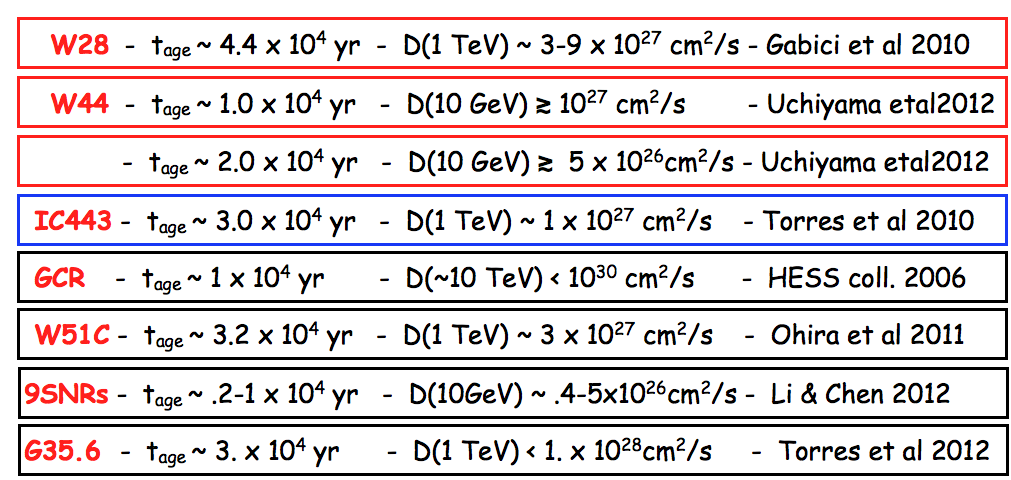

In [3]:
Image(filename='/Users/jmcohen/Dropbox/CurrentWork/SNR_MC/W28_W44_HB3_SED/gabiciSugar2015_TeVSNRMC.png')